# Определение потенциально ушедшего клиента


Целью данной работы является создание модели предсказания отказа клиента от использования услуг для оператора связи, который и является заказчиком. Данный оператор предоставляет услуги связи абонентам, имеется два основных направления: интернет и телефония. В каждом из направлений также имеются дополнительные услуги. Модель по переданным данным должна предсказывать факт ухода клиента, что позволит заказчику разработать ряд мер по повышению лояльности клиента и таким образом изменить решение клиента об уходе.

Нам предоставлены исторические данные в разных таблицах. В данных могут быть аномальные значения, пропуски, бесполезные признаки (с точки зрения полезности для прогнозирования). Нам необходимо проанализировать и привести данные в порядок, разбить данные на подвыборки (так как отдельной тестовой выборки у нас не имеется).

После необходимо обучить несколько моделей предсказания. Мы будем использовать одну классическую модель (RandomForest), а также модель на базе градиентного бустинга (CatBoost). Обученные модели должны соответствовать определенным критериям заказчика:

- **показатель качества модели** - качество следует измерять метрикой ROC-AUC, в итоговой модели должно быть не ниже 0,85.


**Данные:**

Данные находятся в четырех файлах
- **phone_new.csv** - информация об услугах телефонии
- **contract_new.csv** - информация о договорах
- **internet_new.csv** - информация об интернет-услугах
- **personal_new.csv** - персональная информация

**План:**

0. Ознакомиться с данными.


1. Выполнить преобработку данных, а именно:

    - объединить данные в одну таблицу;
    - привести названия колонок к стандарту;
    - заполнить пропуски;
    - изменить в колонках тип данных.
    

2. Создать дополнительные признаки (как было описано выше, количество дней сотрудничества)


3. Провести исследовательский анализ, составить портрет уходящего пользователя по имеющимся данным.


4. Проверка мультиколлинеарности (будем использовать phik, так как обычная корреляция Пирсона нам не подойдет из-за большого количества категориальных признаков).

5. Разделение данных на подвыборки.


6. Кодирование категориальных признаков, масштабирование числовых признаков.



7. Построение моделей, подбор параметров.


8. Выбор лучшей модели, тестирование, выбор оптимального порога.


9. Исследование важности признаков.


10. Отчёт по проделанной работе.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-обзор-данных" data-toc-modified-id="Первичный-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-библиотек" data-toc-modified-id="Загрузка-данных-и-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и библиотек</a></span></li><li><span><a href="#Обзор-исходных-данных" data-toc-modified-id="Обзор-исходных-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор исходных данных</a></span></li><li><span><a href="#Таблица-df_phone-(информация-об-услугах-телефонии)" data-toc-modified-id="Таблица-df_phone-(информация-об-услугах-телефонии)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица df_phone (информация об услугах телефонии)</a></span></li><li><span><a href="#Таблица-df_internet-(информация-об-интернет-услугах)" data-toc-modified-id="Таблица-df_internet-(информация-об-интернет-услугах)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица df_internet (информация об интернет-услугах)</a></span></li><li><span><a href="#Таблица-df_contract-(информация-о-договоре)" data-toc-modified-id="Таблица-df_contract-(информация-о-договоре)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Таблица df_contract (информация о договоре)</a></span></li><li><span><a href="#Таблица-df_personal-(персональные-данные-клиента)" data-toc-modified-id="Таблица-df_personal-(персональные-данные-клиента)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Таблица df_personal (персональные данные клиента)</a></span></li></ul></li><li><span><a href="#Дополнительные-вопросы-для-заказчика" data-toc-modified-id="Дополнительные-вопросы-для-заказчика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Дополнительные вопросы для заказчика</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Объединяем-таблицы" data-toc-modified-id="Объединяем-таблицы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объединяем таблицы</a></span></li><li><span><a href="#Переименовываем-колонки" data-toc-modified-id="Переименовываем-колонки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Переименовываем колонки</a></span></li><li><span><a href="#Заполняем-пропуски" data-toc-modified-id="Заполняем-пропуски-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Заполняем пропуски</a></span></li><li><span><a href="#Меняем-тип-данных" data-toc-modified-id="Меняем-тип-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Меняем тип данных</a></span></li></ul></li><li><span><a href="#Создаем-дополнительные-признаки" data-toc-modified-id="Создаем-дополнительные-признаки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создаем дополнительные признаки</a></span></li><li><span><a href="#Составляем-портрет-уходящего-пользователя" data-toc-modified-id="Составляем-портрет-уходящего-пользователя-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Составляем портрет уходящего пользователя</a></span><ul class="toc-item"><li><span><a href="#Клиенты-только-телефонии" data-toc-modified-id="Клиенты-только-телефонии-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Клиенты только телефонии</a></span></li><li><span><a href="#Клиенты-только-интернета" data-toc-modified-id="Клиенты-только-интернета-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Клиенты только интернета</a></span></li><li><span><a href="#Клиенты-интернета-и-телефонии-вместе" data-toc-modified-id="Клиенты-интернета-и-телефонии-вместе-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Клиенты интернета и телефонии вместе</a></span></li></ul></li><li><span><a href="#Проверка-мультиколлинеарности" data-toc-modified-id="Проверка-мультиколлинеарности-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка мультиколлинеарности</a></span></li><li><span><a href="#Разделение-данных-на-подвыборки" data-toc-modified-id="Разделение-данных-на-подвыборки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Разделение данных на подвыборки</a></span></li><li><span><a href="#Стандартизация-и-кодирование" data-toc-modified-id="Стандартизация-и-кодирование-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Стандартизация и кодирование</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Отчет-для-заказчика" data-toc-modified-id="Отчет-для-заказчика-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Отчет для заказчика</a></span></li></ul></div>

## Первичный обзор данных

### Загрузка данных и библиотек

In [1]:
!pip install phik -q

In [2]:
# необходимые библиотеки
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import phik
%matplotlib inline

from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# по ходу работы импорты будут пополняться

In [3]:
# если можно, открываем файл из локального носителя
# или с Jupyter Hub
try:
    df_phone = pd.read_csv('phone_new.csv')
    df_contract = pd.read_csv('contract_new.csv')
    df_internet = pd.read_csv('internet_new.csv')
    df_personal = pd.read_csv('personal_new.csv')
except:
    df_phone = pd.read_csv('/datasets/phone_new.csv')
    df_contract = pd.read_csv('/datasets/contract_new.csv')
    df_internet = pd.read_csv('/datasets/internet_new.csv')
    df_personal = pd.read_csv('/datasets/personal_new.csv')

### Обзор исходных данных

In [4]:
df_list = [df_phone, df_contract, df_internet, df_personal]

In [5]:
# посмотрим на все наши таблички с общей стороны, оценим количество объектов,
# количество пропусков, типы наших признаков
for df in df_list:
    display(df.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Важно отметить в самом начале, что в дальнейшем нам необходимо объединить все эти данные в одну таблицу.

Делая вывод из полученного описания таблицы, можно сказать, что главными табличками являются `df_personal` и `df_contract`. Пояснение: в этих таблицах больше всего объектов, они общие вне зависимости от типа услуг, которыми пользуется клиент (интернет, телефония, интернет + телефония).

Соответственно, в дальнейшем при объединении таблиц (а объединять будем по ID клиента) будут встречаться пропуски в данных у тех клиентов, которые пользуются только одной из предоставляемых услуг (либо телефонией, либо интернетом).

Также стоит отметить, что большинство признаков имеют тип данных `object`, что не во всех случаях верно: даты необходимо будет привести к правильному формату.

Написание столбцов придется откорректировать: вместо `customerID`, `SeniorCitizen` - `customer_id`, `senior_citizen`. Эти два столбца к примеру, по аналогии все колонки необходимо переименовать согласно snake_case.

Оценим наши таблицы по содержанию:

In [6]:
for df in df_list:
    display(df.head(10))
    print('\n')

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
5  7892-POOKP           Yes
6  6388-TABGU            No
7  9763-GRSKD            No
8  7469-LKBCI            No
9  8091-TTVAX           Yes

customerID   BeginDate     EndDate            Type PaperlessBilling   
0  7590-VHVEG  2020-01-01          No  Month-to-month              Yes  \
1  5575-GNVDE  2017-04-01          No        One year               No   
2  3668-QPYBK  2019-10-01          No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01          No        One year               No   
4  9237-HQITU  2019-09-01          No  Month-to-month              Yes   
5  9305-CDSKC  2019-03-01          No  Month-to-month              Yes   
6  1452-KIOVK  2018-04-01          No  Month-to-month              Yes   
7  6713-OKOMC  2019-04-01          No  Month-to-month               No   
8  7892-POOKP  2017-07-01          No  Month-to-month              Yes   
9  6388-TABGU  2014-12-01  2017-05-01        One year               No   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  
5           Electronic check           99.65      1150.96  
6    Credit card (automatic)           89.10      2058.21  
7               Mailed check           29.75       300.48  
8           Electronic check          104.80      3573.68  
9  Bank transfer (automatic)           56.15      1628.35

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection   
0  7590-VHVEG             DSL             No          Yes               No  \
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   
5  9305-CDSKC     Fiber optic             No           No              Yes   
6  1452-KIOVK     Fiber optic             No          Yes               No   
7  6713-OKOMC             DSL            Yes           No               No   
8  7892-POOKP     Fiber optic             No           No              Yes   
9  6388-TABGU             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
5          No         Yes             Yes  
6          No         Yes              No  
7          No          No              No  
8         Yes         Yes             Yes  
9          No          No              No

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
5  9305-CDSKC  Female              0      No         No
6  1452-KIOVK    Male              0      No        Yes
7  6713-OKOMC  Female              0      No         No
8  7892-POOKP  Female              0     Yes         No
9  6388-TABGU    Male              0      No        Yes

Здесь стоит детально описать каждую таблицу и ее особенности:

### Таблица df_phone (информация об услугах телефонии)

Здесь всего две колонки: id клиента и наличие нескольких линий у абонента.

При объединении данных клиенты, которые не используют телефонию, будут иметь пропуски в столбце `MultipleLines`. Заполнять данный пробел следует отдельным значением (например, `'not used'`).

### Таблица df_internet (информация об интернет-услугах)

Здесь уже 8 столбцов, одним из которых является id клиента, информация о виде соединения, которое используется клиентом, а также 6 колонок с дополнительными услугами.

По аналогии с предыдущей таблицей, при объединении мы получим пропуски в тех `customerID`, которые пользуются только телефонией.

Для колонки с типом соединения выберем также отдельную категорию (например, `'not used'`), а колонки с доп. услугами у таких клиентов необходимо заполнить значением `'No'`, так как введение дополнительных категорий в этих столбцах создаст коллинеарность в нецелевых признаках, что повлияет на дальнейший результат.

### Таблица df_contract (информация о договоре)

В этой таблице также 8 столбцов, один из которых id клиента, даты начала и конца контрактов на услуги связи, тип абонентской платы, способ выставления счета, способ оплаты, плата за месяц и общие расходы клиента.

Сразу возникает вопрос о последнем столбце - почему тип колонки `object`. Скорее всего там присутствует какое-то текстовое значение или значение не заполнено. Проверим:

In [7]:
df_contract['TotalCharges'].value_counts()[:15]

TotalCharges
          11
20.45      6
101.0      5
21.53      4
40.1       4
255.0      4
19.65      4
732.6      4
1007.5     4
1155.0     3
1807.2     3
279.0      3
265.2      3
61.5       3
917.7      3
Name: count, dtype: int64

Как и предполагалось, 11 строк с пропуском вместо значения. Посмотрим, что это за строки:

In [8]:
df_contract.query("TotalCharges == ' '")

customerID   BeginDate EndDate      Type PaperlessBilling   
488   4472-LVYGI  2020-02-01      No  Two year              Yes  \
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936                Mailed check           80.85               
1082               Mailed check           25.75               
1340    Credit card (automatic)           56.05               
3331               Mailed check           19.85               
3826               Mailed check           25.35               
4380               Mailed check           20.00               
5218               Mailed check           19.70               
6670               Mailed check           73.35               
6754  Bank transfer (automatic)           61.90

Это клиенты, которые подписали договор в дату выгрузки таблицы, то есть они не успели попользоваться услугами оператора, поэтому в `TotalCharges` пропуски. Данные пропуски мы заполним одной месячной платой.

На основе колонок `BeginDate` и `EndDate` создадим целевой признак: если `EndDate` заполнен датой, значит клиент ушел.

Следует сделать еще один признак - количество дней/месяцев, сколько клиент пользовался услугами оператора. Также на основе этих колонок.

Можно уже оценить баланс классов в нашей будущей таблице:

In [9]:
percent = round(df_contract.query('EndDate == "No"').shape[0] / df_contract.shape[0] * 100, 2)
print(f"Доля неушедших клиентов: {percent}%")

Доля неушедших клиентов: 84.37%


Дисбаланс классов имеется, но, так как оценивать будем с помощью ROC-AUC, синтетически балансировать данные не будем. При этом, возможно, придется настроить отсечку по вероятностям.

### Таблица df_personal (персональные данные клиента)

5 колонок: id клиента, пол, пожилой/не пожилой, семейное положение, иждивенцы.

Добавим проверку на уникальность записей в колонке с номером id клиента, так как в дальнейшем нам придется объединять колонки по этому признаку:

In [10]:
for df in df_list:
    print(str(df['customerID'].shape[0]) + ' / ' + str(df['customerID'].nunique()))


6361 / 6361
7043 / 7043
5517 / 5517
7043 / 7043


**Вывод**: в каждой таблице в данной колонке содержатся только уникальные значения.

Далее проверим выбросы в колонках с числовыми значениями и варианты значений в категориальных столбцах:

In [11]:
# Строим box-plot, чтобы оценить выбросы в наших числовых колонках:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
for df in df_list:
    for col in df.columns:
        if df[col].dtype != 'object' and df[col].nunique() > 2:
            plt.xlim(0, (df[col].max() + df[col].max()*0.3))
            ax = sns.boxplot(x=df[col])
            plt.title(f'Анализ выбросов для колонки {col}')
            plt.show()

На данный момент числовая колонка (именно int или float) только одна, это MonthlyCharges, добавим проверку для TotalCharges и колонки с началом контракта:

In [12]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [13]:
df_contract.loc[df_contract['TotalCharges'].isna(), 'TotalCharges'] = df_contract[df_contract['TotalCharges'].isna()]['MonthlyCharges']

In [14]:
plt.xlim(0, (df_contract['TotalCharges'].max() + df_contract['TotalCharges'].max()*0.3))
ax = sns.boxplot(x=df_contract['TotalCharges'])
plt.title(f'Анализ выбросов для колонки "Общие затраты абонента"')
plt.show()

In [15]:
# Оценим, с какого значения суммарных трат начинаются выбросы
q_25 = np.quantile(df_contract['TotalCharges'], 0.25)
q_75 = np.quantile(df_contract['TotalCharges'], 0.75)
x_max = q_75 + (q_75 - q_25) * 1.5
x_max

7436.599999999999

In [16]:
df_contract.query('TotalCharges > @x_max')

customerID   BeginDate EndDate      Type PaperlessBilling   
17    9959-WOFKT  2014-03-01      No  Two year               No  \
57    5067-XJQFU  2014-08-01      No  One year              Yes   
59    5954-BDFSG  2014-02-01      No  Two year              Yes   
106   6728-DKUCO  2014-02-01      No  One year              Yes   
198   7255-SSFBC  2014-02-01      No  Two year              Yes   
...          ...         ...     ...       ...              ...   
6859  3508-CFVZL  2014-03-01      No  Two year               No   
6910  0530-IJVDB  2014-04-01      No  Two year              Yes   
6913  8213-TAZPM  2014-05-01      No  One year              Yes   
6992  0218-QNVAS  2014-03-01      No  One year               No   
7022  7203-OYKCT  2014-02-01      No  One year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
17    Bank transfer (automatic)          106.70       8257.51  
57             Electronic check          108.45       7730.32  
59      Credit card (automatic)          107.50       7740.00  
106            Electronic check          104.15       7498.80  
198   Bank transfer (automatic)          112.25       8324.46  
...                         ...             ...           ...  
6859               Mailed check          111.30       7902.30  
6910           Electronic check          114.60       8182.44  
6913  Bank transfer (automatic)          108.75       7728.86  
6992  Bank transfer (automatic)          100.55       7638.78  
7022           Electronic check          104.95       8085.35  

[195 rows x 8 columns]

195 строк с выбивающимися значениями в колонке TotalCharges. Не так много, и не такие запредельные значения, удалять не будем.

In [17]:

for df in df_list:
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() > 2 and col not in ['customerID', 'EndDate']:
            display(df[col].value_counts())

BeginDate
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

**Вывод**: столбцов, где более двух категориальных значений во всех наших таблицах только два: тип платежа и тип оплаты. В этих колонках категорий только 3 и 4 соответственно, что не мешает дальнейшей работе. Повторяющихся категорий не выявлено. В последующем закодируем их с помощью OrdinalEncoding.

## Дополнительные вопросы для заказчика

Могу выделить 5 дополнительных вопросов заказчику:

- не лучше ли создать две модели - одну для интернет-услуг, другую для телефонии, чтобы сузить поиск возможных причин ухода клиента и разработать мероприятия по предупреждению оттока клиентов согласно целевой услуге? Если раздача "плюшек" будет более точная, соответствующая запросам клиента, возможно, эффективность удержания уходящего клиента повыситься. Это как гипотеза.


- есть ли какие-то данные по географии наших клиентов, так как это тоже немаловажный фактор: если в каком-то городе проблема с оборудованием, это будет сильно влиять на статистику (не одними же плюшками держать абонента, нужно работать над качеством услуг). Или это пользователи внутри одного города? (даже в этом случае полезно понимать, в каком районе города абонент).


- определение пожилой/непожилой - это конечно хорошо, но было бы неплохо добавить более точную информацию по возрасту абонента: так и "плюшки" будут более точными, и портрет клиента станет более широким.


- есть ли возможность добавить дополнительные технические характеристики по услугам: например, для телефонии - количество затрачиваемых абонентом минут по междугородней/международной связи, а для интернета - количество трафика, используемое клиентом.


- в чем измеряется месячная оплата и общие расходы на связь? (это для удобства дальнейших расчетов)

## Предобработка данных

### Объединяем таблицы

In [18]:
# объединять будем с главных колонок (где больше всего id клиентов)
df_merged = df_contract.merge(df_personal, how='inner', on='customerID')

In [19]:
# добавляем информацию из колонки с телефонией
df_merged = df_merged.merge(df_phone, how='left', on='customerID')

In [20]:
# добавляем информацию из колонки с интернетом
df_merged = df_merged.merge(df_internet, how='left', on='customerID')

In [21]:
df_merged.head(10)

customerID   BeginDate     EndDate            Type PaperlessBilling   
0  7590-VHVEG  2020-01-01          No  Month-to-month              Yes  \
1  5575-GNVDE  2017-04-01          No        One year               No   
2  3668-QPYBK  2019-10-01          No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01          No        One year               No   
4  9237-HQITU  2019-09-01          No  Month-to-month              Yes   
5  9305-CDSKC  2019-03-01          No  Month-to-month              Yes   
6  1452-KIOVK  2018-04-01          No  Month-to-month              Yes   
7  6713-OKOMC  2019-04-01          No  Month-to-month               No   
8  7892-POOKP  2017-07-01          No  Month-to-month              Yes   
9  6388-TABGU  2014-12-01  2017-05-01        One year               No   

               PaymentMethod  MonthlyCharges  TotalCharges  gender   
0           Electronic check           29.85         31.04  Female  \
1               Mailed check           56.95       2071.84    Male   
2               Mailed check           53.85        226.17    Male   
3  Bank transfer (automatic)           42.30       1960.60    Male   
4           Electronic check           70.70        353.50  Female   
5           Electronic check           99.65       1150.96  Female   
6    Credit card (automatic)           89.10       2058.21    Male   
7               Mailed check           29.75        300.48  Female   
8           Electronic check          104.80       3573.68  Female   
9  Bank transfer (automatic)           56.15       1628.35    Male   

   SeniorCitizen Partner Dependents MultipleLines InternetService   
0              0     Yes         No           NaN             DSL  \
1              0      No         No            No             DSL   
2              0      No         No            No             DSL   
3              0      No         No           NaN             DSL   
4              0      No         No            No     Fiber optic   
5              0      No         No           Yes     Fiber optic   
6              0      No        Yes           Yes     Fiber optic   
7              0      No         No           NaN             DSL   
8              0     Yes         No           Yes     Fiber optic   
9              0      No        Yes            No             DSL   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV   
0             No          Yes               No          No          No  \
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   
5             No           No              Yes          No         Yes   
6             No          Yes               No          No         Yes   
7            Yes           No               No          No          No   
8             No           No              Yes         Yes         Yes   
9            Yes          Yes               No          No          No   

  StreamingMovies  
0              No  
1              No  
2              No  
3              No  
4              No  
5             Yes  
6              No  
7              No  
8             Yes  
9              No

In [22]:
# проверим, все ли правильно соединилось
df_merged['customerID'].nunique()

7043

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


**Промежуточный вывод**: получили 19 колонок, из которых наблюдаются пропуски в колонках по телефонии и интернету. Мы к этому готовы, проблему описывали выше. В дальнейшем от пропусков избавимся, но для начала приведем к стандарту названия столбцов.

### Переименовываем колонки

С помощью регулярных выражений изменим названия колонок. Для этого напишем шаблон и функцию:

In [24]:
pattern = r'(?<!^)(?=[A-Z])'

In [25]:
def add_underscore(name):
    
    '''Функция принимает название колонки и возвращает название в нижнем регистре, 
    разделенное нижним подчеркиванием'''
    
    return re.sub(pattern, '_', name).lower()

In [26]:
for col in df_merged.columns:
    new_name = add_underscore(col)
    df_merged.rename(columns={col: new_name}, inplace=True)

In [27]:
df_merged.columns

Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies'],
      dtype='object')

Почти хорошо, кроме колонок `customer_i_d` и `streaming_t_v`. Так вышло, потому что в их названиях большие буквы идут подряд (в сокращениях TV и ID). Поменяем эти названия ручками:

In [28]:
df_merged.rename(columns={'customer_i_d': 'customer_id', 'streaming_t_v': 'streaming_tv'}, inplace=True)

In [29]:
# убедимся, что все получилось
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   float64
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  multiple_lines     6361 non-null   object 
 13  internet_service   5517 non-null   object 
 14  online_security    5517 non-null   object 
 15  online_backup      5517 non-null   object 
 16  device_protection  5517 

### Заполняем пропуски

При детальном рассмотрении исходных таблиц мы выделили проблемы, связанные с полученными пропусками после объединения:

- При объединении данных клиенты, которые не используют телефонию, будут иметь пропуски в столбце `MultipleLines`. Заполнять данный пробел следует отдельным значением (например, `'not used'`).


- Для колонки с типом соединения выберем также отдельную категорию (например, `'not used'`), а колонки с доп. услугами у таких клиентов необходимо заполнить значением `'No'`, так как введение дополнительных категорий в этих столбцах создаст коллинеарность в нецелевых признаках, что повлияет на дальнейший результат.

In [30]:
# приступим
for col in df_merged.columns:
    if col in ['multiple_lines', 'internet_service']:
        df_merged[col].fillna('not used', inplace=True)
    else:
        df_merged[col].fillna('No', inplace=True)

In [31]:
# убедимся, что все получилось
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   float64
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  multiple_lines     7043 non-null   object 
 13  internet_service   7043 non-null   object 
 14  online_security    7043 non-null   object 
 15  online_backup      7043 non-null   object 
 16  device_protection  7043 

In [32]:
# оценим визуально
df_merged.head(12)

customer_id  begin_date    end_date            type paperless_billing   
0   7590-VHVEG  2020-01-01          No  Month-to-month               Yes  \
1   5575-GNVDE  2017-04-01          No        One year                No   
2   3668-QPYBK  2019-10-01          No  Month-to-month               Yes   
3   7795-CFOCW  2016-05-01          No        One year                No   
4   9237-HQITU  2019-09-01          No  Month-to-month               Yes   
5   9305-CDSKC  2019-03-01          No  Month-to-month               Yes   
6   1452-KIOVK  2018-04-01          No  Month-to-month               Yes   
7   6713-OKOMC  2019-04-01          No  Month-to-month                No   
8   7892-POOKP  2017-07-01          No  Month-to-month               Yes   
9   6388-TABGU  2014-12-01  2017-05-01        One year                No   
10  9763-GRSKD  2019-01-01          No  Month-to-month               Yes   
11  7469-LKBCI  2018-10-01          No        Two year                No   

               payment_method  monthly_charges  total_charges  gender   
0            Electronic check            29.85          31.04  Female  \
1                Mailed check            56.95        2071.84    Male   
2                Mailed check            53.85         226.17    Male   
3   Bank transfer (automatic)            42.30        1960.60    Male   
4            Electronic check            70.70         353.50  Female   
5            Electronic check            99.65        1150.96  Female   
6     Credit card (automatic)            89.10        2058.21    Male   
7                Mailed check            29.75         300.48  Female   
8            Electronic check           104.80        3573.68  Female   
9   Bank transfer (automatic)            56.15        1628.35    Male   
10               Mailed check            49.95         649.35    Male   
11    Credit card (automatic)            18.95         312.30    Male   

    senior_citizen partner dependents multiple_lines internet_service   
0                0     Yes         No       not used              DSL  \
1                0      No         No             No              DSL   
2                0      No         No             No              DSL   
3                0      No         No       not used              DSL   
4                0      No         No             No      Fiber optic   
5                0      No         No            Yes      Fiber optic   
6                0      No        Yes            Yes      Fiber optic   
7                0      No         No       not used              DSL   
8                0     Yes         No            Yes      Fiber optic   
9                0      No        Yes             No              DSL   
10               0     Yes        Yes             No              DSL   
11               0      No         No             No         not used   

   online_security online_backup device_protection tech_support streaming_tv   
0               No           Yes                No           No           No  \
1              Yes            No               Yes           No           No   
2              Yes           Yes                No           No           No   
3              Yes            No               Yes          Yes           No   
4               No            No                No           No           No   
5               No            No               Yes           No          Yes   
6               No           Yes                No           No          Yes   
7              Yes            No                No           No           No   
8               No            No               Yes          Yes          Yes   
9              Yes           Yes                No           No           No   
10             Yes            No                No           No           No   
11              No            No                No           No           No   

   streaming_movies  
0                No  
1                No  
2      

**Промежуточный вывод**: пропуски заполнили, названия поменяли. Далее изменим тип данных в тех колонках, где это требуется.

### Меняем тип данных

Данные необходимо поменять в следующих колонках:

- `begin_date`, `end_date` - на datetime.


С `begin_date` проблем не возникнет, но в `end_date` встречаются строки с датой и строки со значением "No". Поэтому сначала выделим наш целевой признак в отдельную колонку, после заменим "No" в `end_date` датой выгрузки (1 февраля 2020), а уже потом поменяем тип данных.

In [33]:
# колонка с таргетом
df_merged['target'] = df_merged['end_date'].apply(lambda x: 0 if x == 'No' else 1)

In [34]:
df_merged['end_date'] = df_merged['end_date'].replace('No', '2020-02-01')

In [35]:
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'])

In [36]:
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'])

In [37]:
# убедимся, что все получилось
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

**Промежуточный вывод**: данные предобработали согласно плану, на следующем этапе добавим колонку с количеством дней сотрудничества с клиентом.

## Создаем дополнительные признаки

In [38]:
df_merged['count_days'] = df_merged['end_date'] - df_merged['begin_date']

In [39]:
# таймдельту переведем в int
df_merged['count_days'] = df_merged['count_days'].dt.days

In [40]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

## Составляем портрет уходящего пользователя

Для составления разделим данные на две таблицы - ушедший клиент и действующий клиент. Далее пройдемся по всем признакам, нарисуем графики для каждого признака. После опишем все в выводе.

In [41]:
departed = df_merged.query('target == 1')
current = df_merged.query('target == 0')

In [42]:
departed_phone = departed.query('(internet_service == "not used") and (multiple_lines != "not used")')
current_phone = current.query('(internet_service == "not used") and (multiple_lines != "not used")')

In [43]:
departed_internet = departed.query('(internet_service != "not used") and (multiple_lines == "not used")')
current_internet = current.query('(internet_service != "not used") and (multiple_lines == "not used")')

In [44]:
departed_all = departed.query('(internet_service != "not used") and (multiple_lines != "not used")')
current_all = current.query('(internet_service != "not used") and (multiple_lines != "not used")')

In [45]:
features_num = ['monthly_charges', 'total_charges', 'count_days']

### Клиенты только телефонии

Средний показатель ушедшего клиента телефонии: 22.00
Средний показатель действующего клиента телефонии: 20.97






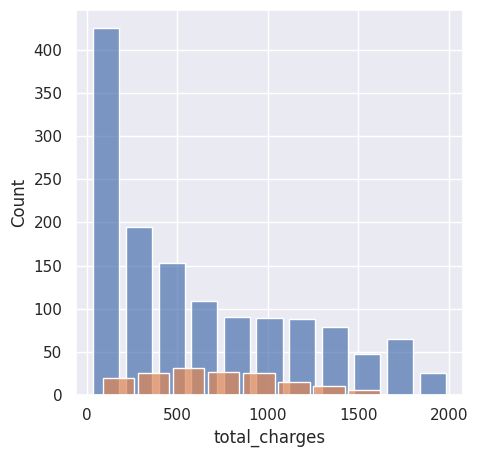

Средний показатель ушедшего клиента телефонии: 718.21
Средний показатель действующего клиента телефонии: 616.39






Средний показатель ушедшего клиента телефонии: 967.57
Средний показатель действующего клиента телефонии: 846.98






In [46]:
# для начала посмотрим как распределены клиенты по числовым признакам
for col in features_num:
    plt.figure(figsize=(5, 5))
    sns.set(style="darkgrid")
    sns.histplot(current_phone[col], alpha=0.7, bins=int(1 + math.log2(current_phone[col].shape[0])), shrink=.8)
    sns.histplot(departed_phone[col], alpha=0.7, bins=int(1 + math.log2(departed_phone[col].shape[0])), shrink=.9)
    plt.show()
    print(f'Средний показатель ушедшего клиента телефонии: {departed_phone[col].mean():.2f}')
    print(f'Средний показатель действующего клиента телефонии: {current_phone[col].mean():.2f}')
    print('\n'*3)

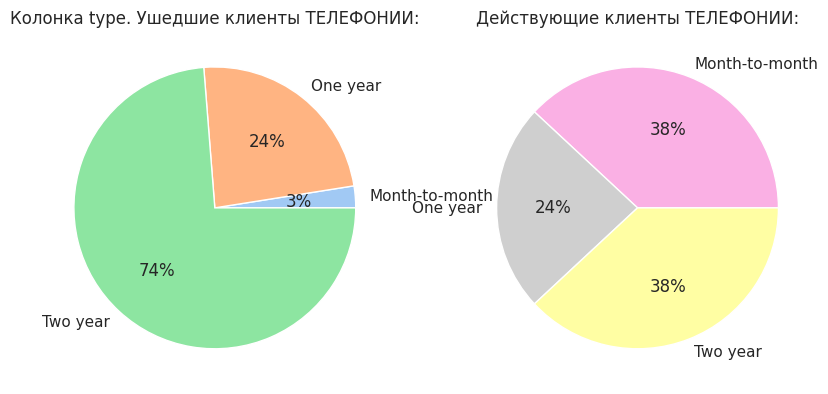

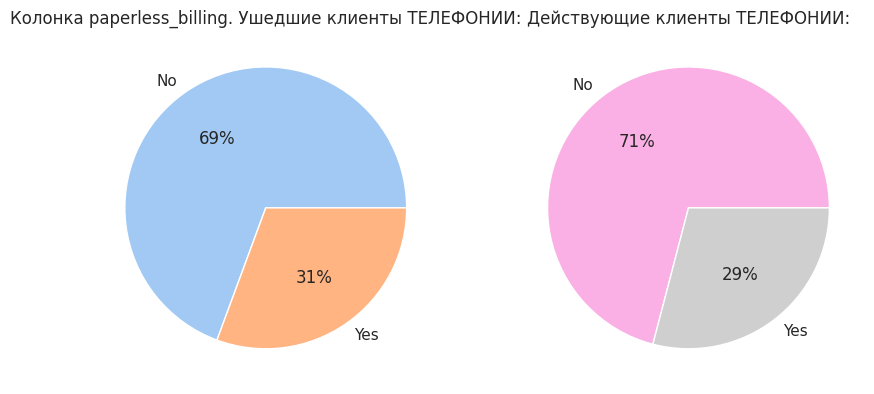

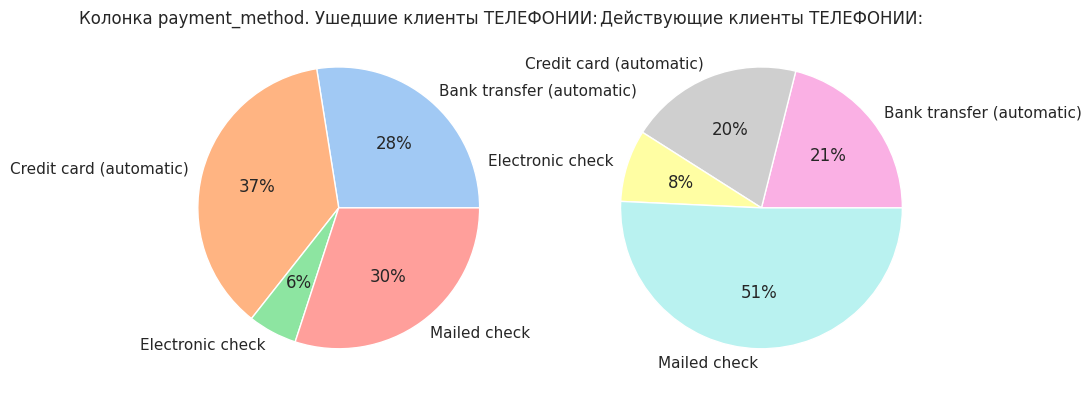

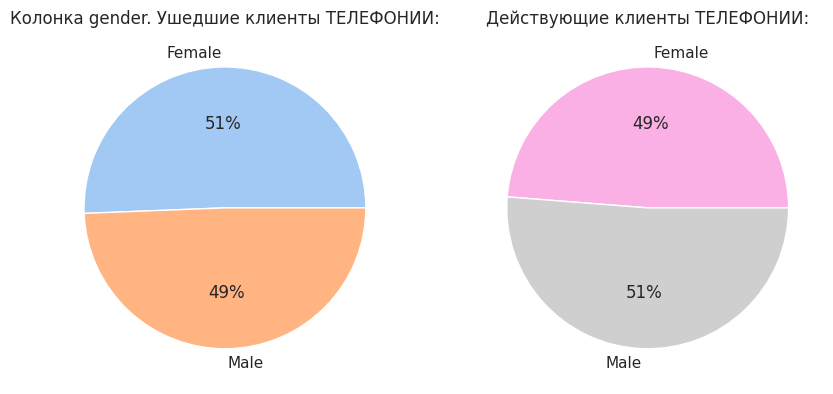

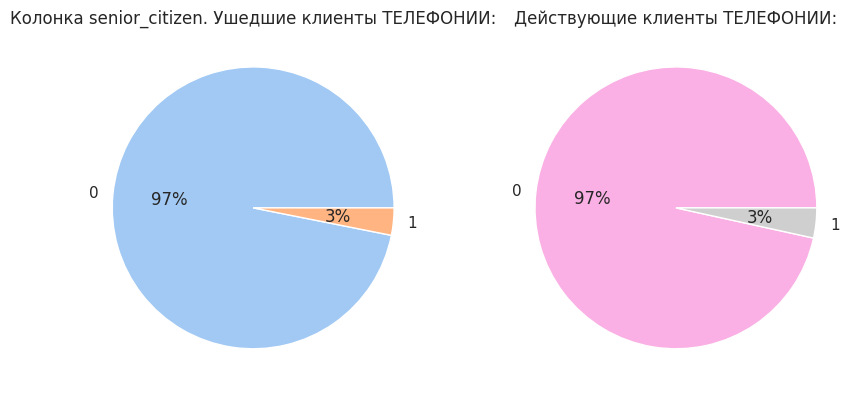

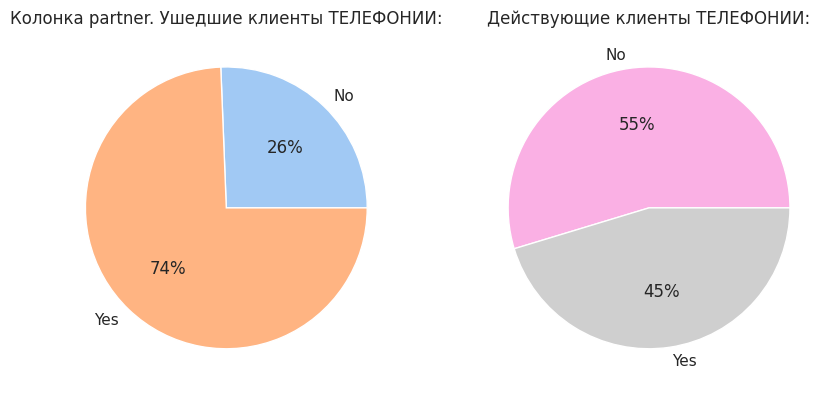

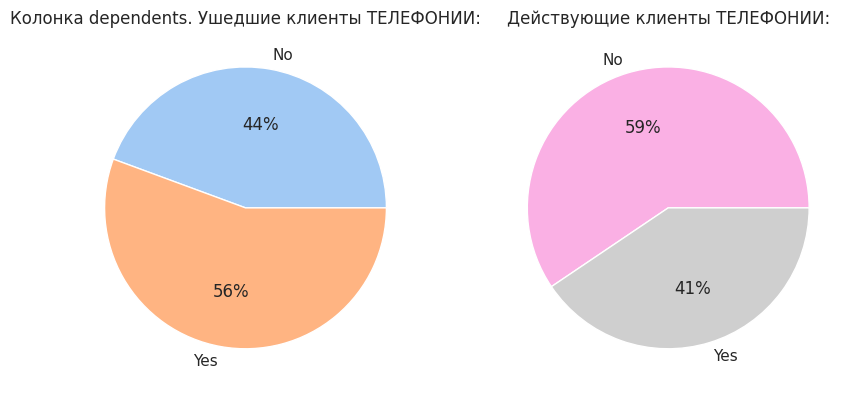

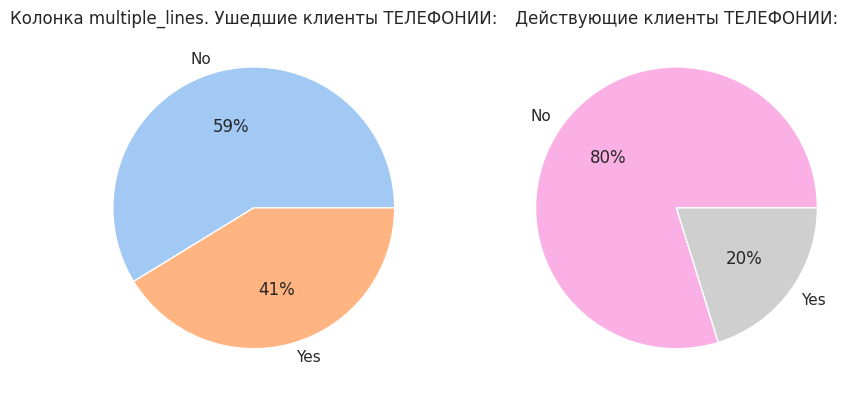

In [47]:
# ниже посмотрим по категориальным признакам
for col in df_merged.columns:
    if (col not in features_num and col not in ['customer_id', 
                                                'begin_date', 
                                                'end_date', 
                                                'target'] 
        and col not in ['streaming_movies', 
                    'streaming_tv', 
                    'tech_support', 
                    'device_protection', 
                    'online_backup', 
                    'online_security',
                       'internet_service']):
        df = departed_phone.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])

        plt.rcParams["figure.figsize"] = (10,10)
        colors = sns.color_palette('pastel')[ 0:6 ]
        
        
        fig, ax = plt.subplots(1, 2)
        ax[0].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        
        
        
        df = current_phone.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])
        colors = sns.color_palette('pastel')[ 6:11 ]
        ax[1].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        ax[0].set_title(f'Колонка {col}. Ушедшие клиенты ТЕЛЕФОНИИ:')
        ax[1].set_title('Действующие клиенты ТЕЛЕФОНИИ:')
        plt.show()
        
        print('\n' * 5)

### Клиенты только интернета

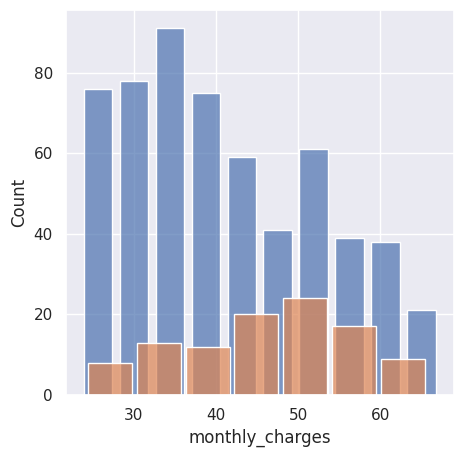

Средний показатель ушедшего клиента интернета: 46.23
Средний показатель действующего клиента интернета: 41.28






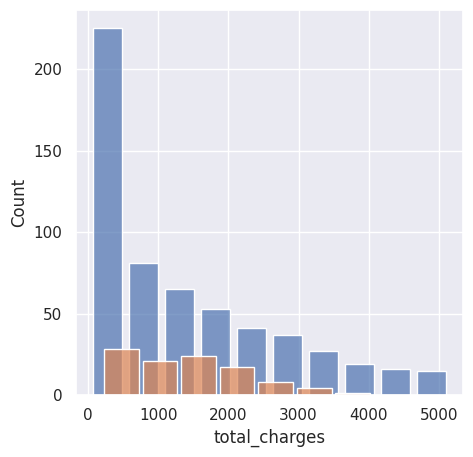

Средний показатель ушедшего клиента интернета: 1420.58
Средний показатель действующего клиента интернета: 1375.35






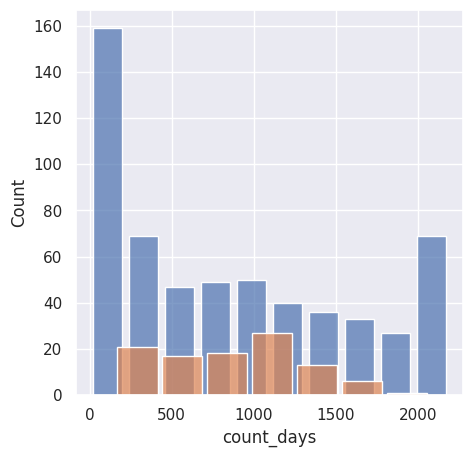

Средний показатель ушедшего клиента интернета: 886.83
Средний показатель действующего клиента интернета: 874.52






In [48]:
# для начала посмотрим как распределены клиенты по числовым признакам
for col in features_num:
    plt.figure(figsize=(5, 5))
    sns.set(style="darkgrid")
    sns.histplot(current_internet[col], alpha=0.7, bins=int(1 + math.log2(current_internet[col].shape[0])), shrink=.8)
    sns.histplot(departed_internet[col], alpha=0.7, bins=int(1 + math.log2(departed_internet[col].shape[0])), shrink=.9)
    plt.show()
    print(f'Средний показатель ушедшего клиента интернета: {departed_internet[col].mean():.2f}')
    print(f'Средний показатель действующего клиента интернета: {current_internet[col].mean():.2f}')
    print('\n'*3)

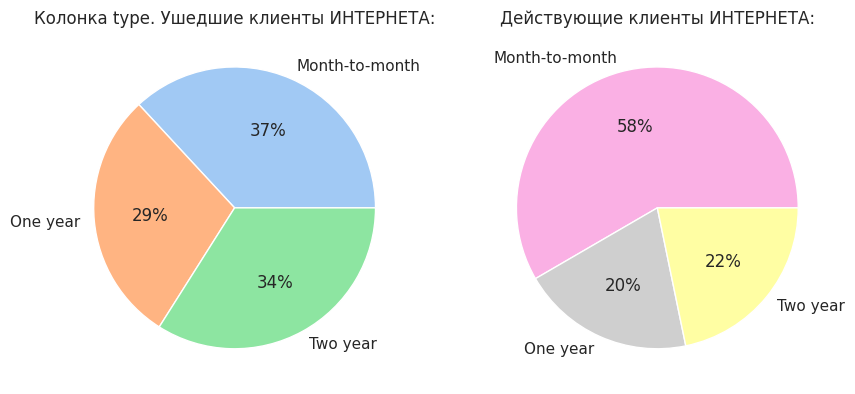

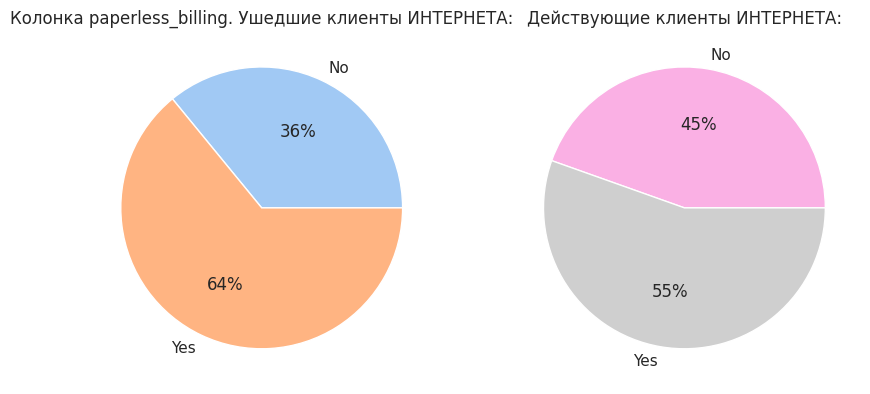

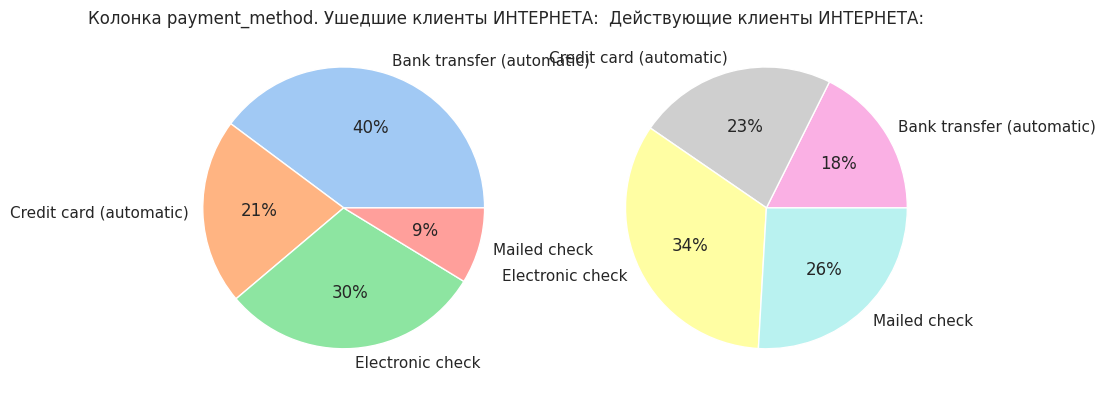

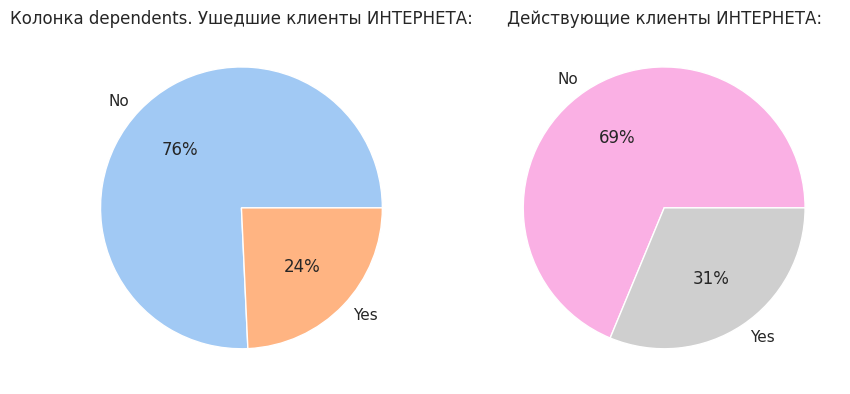

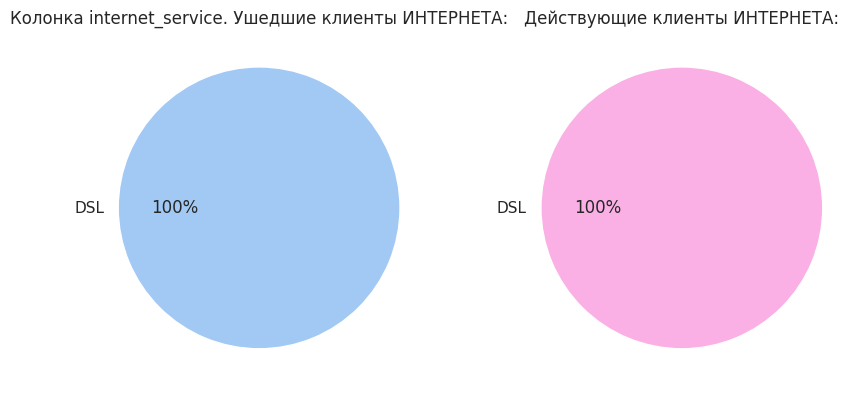

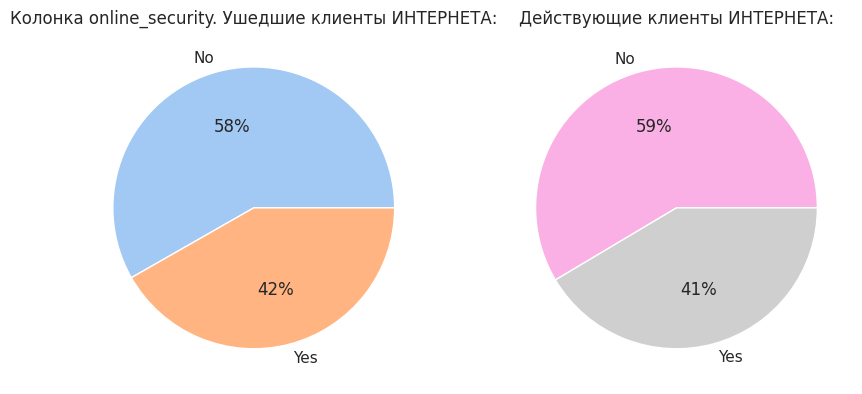

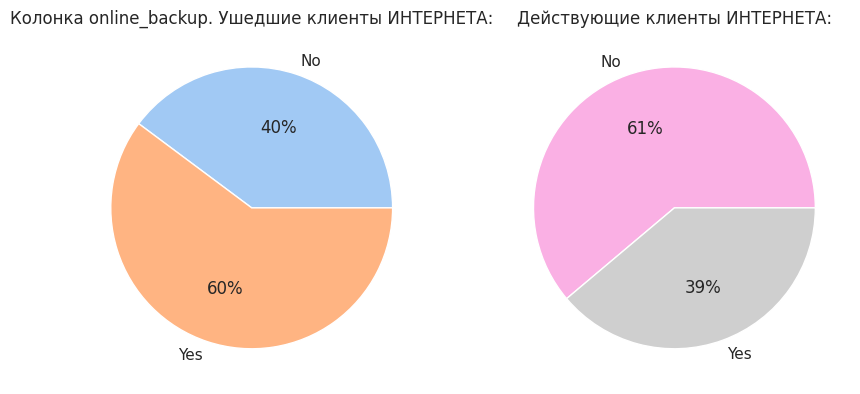

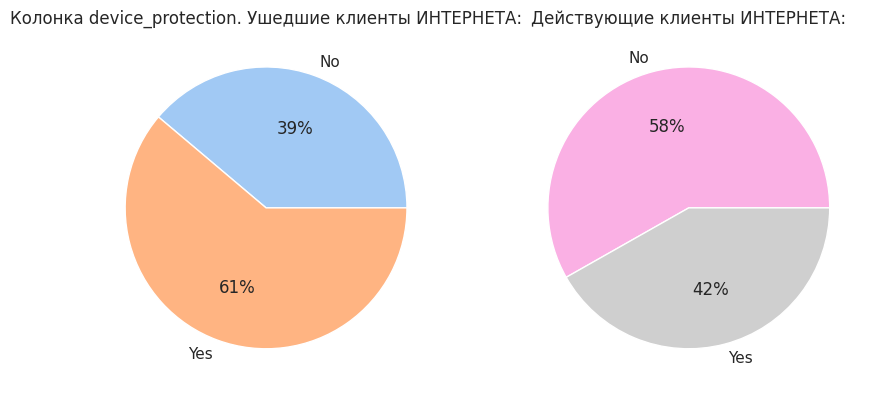

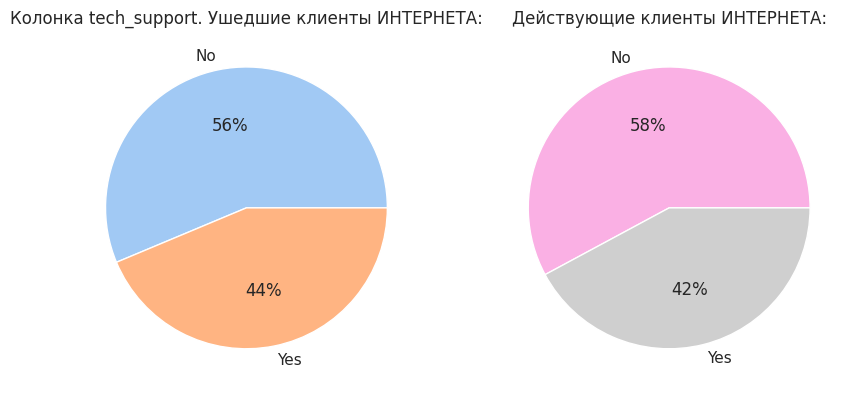

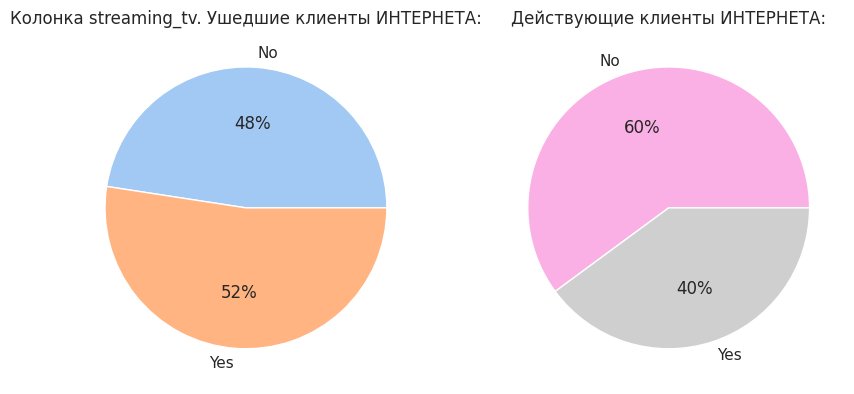

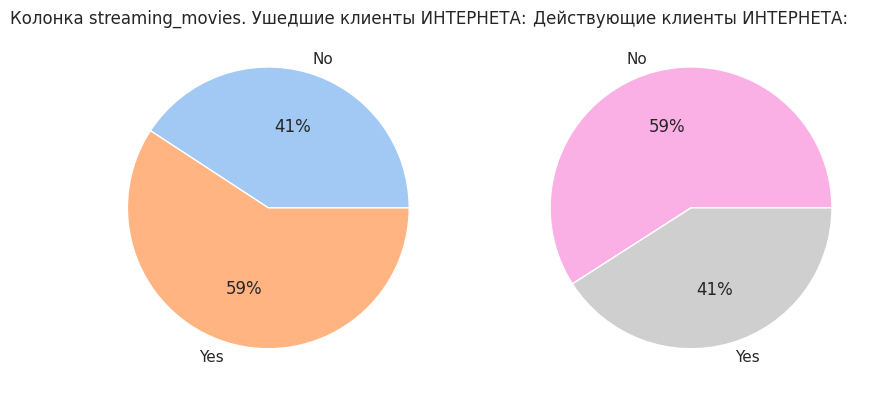

In [49]:
# ниже посмотрим по категориальным признакам
for col in df_merged.columns:
    if col not in features_num and col not in ['customer_id', 
                                               'begin_date', 
                                               'end_date', 
                                               'target',
                                              'multiple_lines']:
        df = departed_internet.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])

        plt.rcParams["figure.figsize"] = (10,10)
        colors = sns.color_palette('pastel')[ 0:6 ]
        
        
        fig, ax = plt.subplots(1, 2)
        ax[0].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        
        
        
        df = current_internet.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])
        colors = sns.color_palette('pastel')[ 6:11 ]
        ax[1].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        ax[0].set_title(f'Колонка {col}. Ушедшие клиенты ИНТЕРНЕТА:')
        ax[1].set_title('Действующие клиенты ИНТЕРНЕТА:')
        plt.show()
        
        print('\n' * 5)

### Клиенты интернета и телефонии вместе

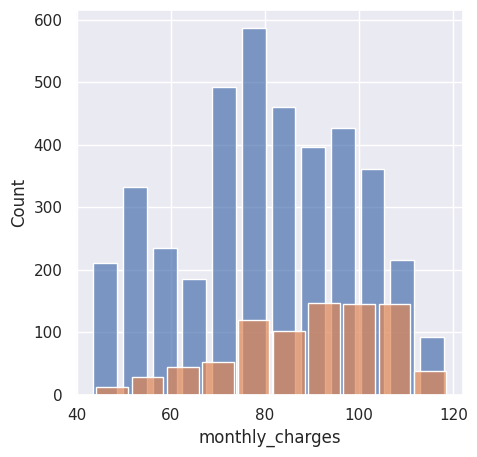

Средний показатель ушедшего клиента интернета + телефонии: 89.37
Средний показатель действующего клиента интернета + телефонии: 80.16






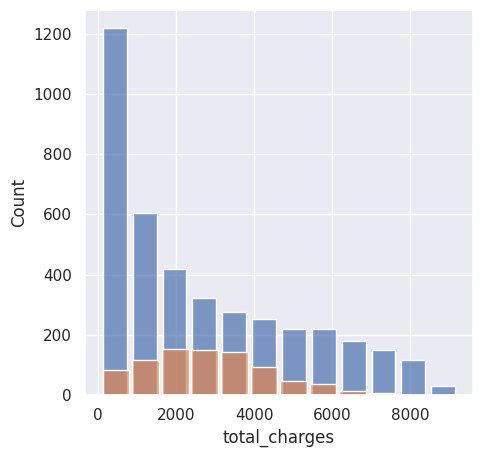

Средний показатель ушедшего клиента интернета + телефонии: 2803.88
Средний показатель действующего клиента интернета + телефонии: 2664.35






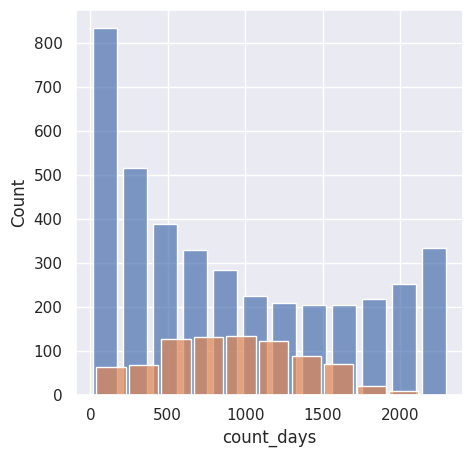

Средний показатель ушедшего клиента интернета + телефонии: 921.39
Средний показатель действующего клиента интернета + телефонии: 912.42






In [50]:
# для начала посмотрим как распределены клиенты по числовым признакам
for col in features_num:
    plt.figure(figsize=(5, 5))
    sns.set(style="darkgrid")
    sns.histplot(current_all[col], alpha=0.7, bins=int(1 + math.log2(current_all[col].shape[0])), shrink=.8)
    sns.histplot(departed_all[col], alpha=0.7, bins=int(1 + math.log2(departed_all[col].shape[0])), shrink=.9)
    plt.show()
    print(f'Средний показатель ушедшего клиента интернета + телефонии: {departed_all[col].mean():.2f}')
    print(f'Средний показатель действующего клиента интернета + телефонии: {current_all[col].mean():.2f}')
    print('\n'*3)

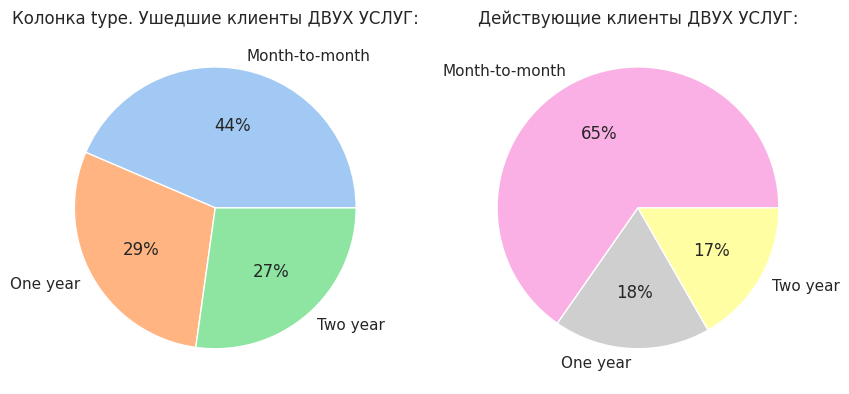

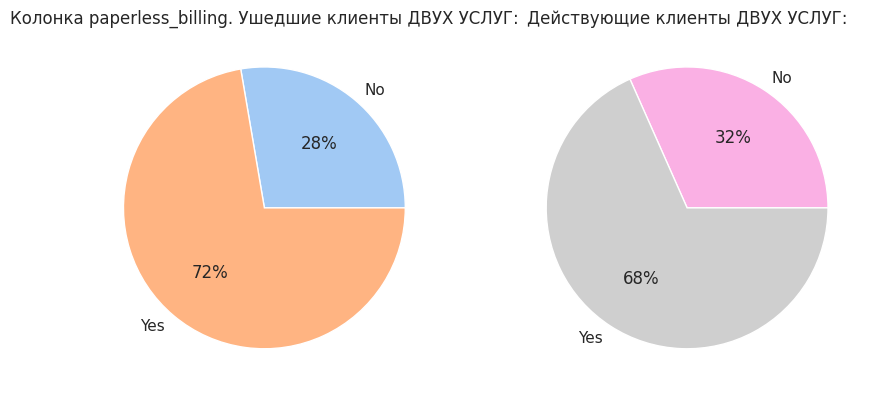

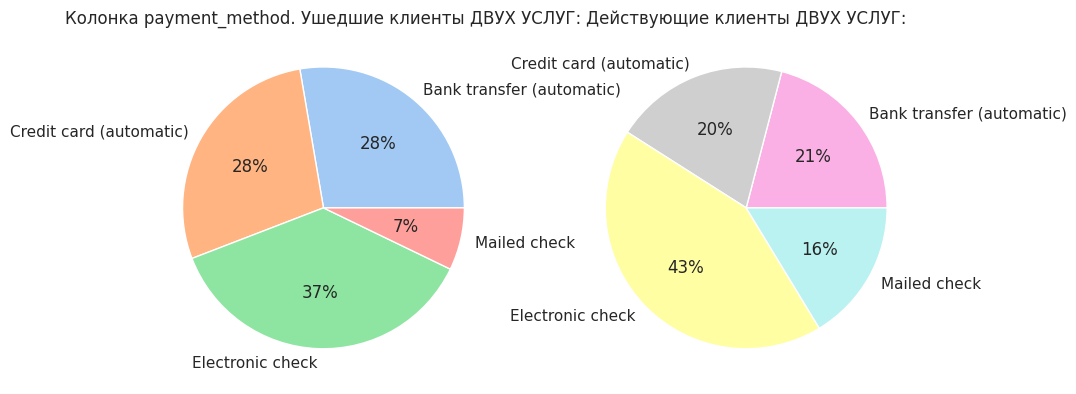

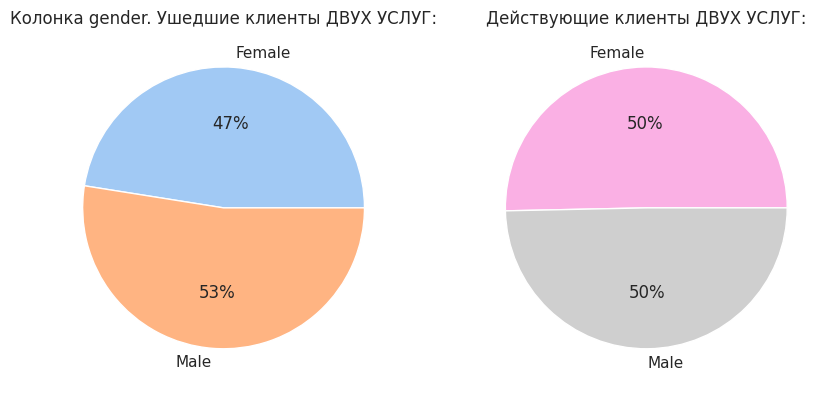

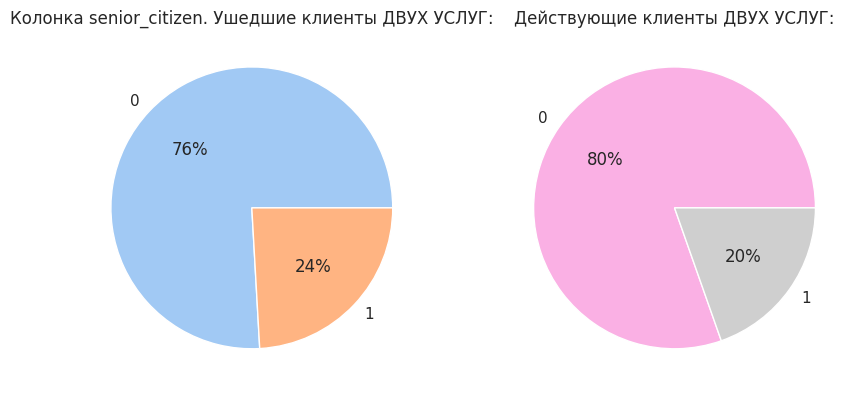

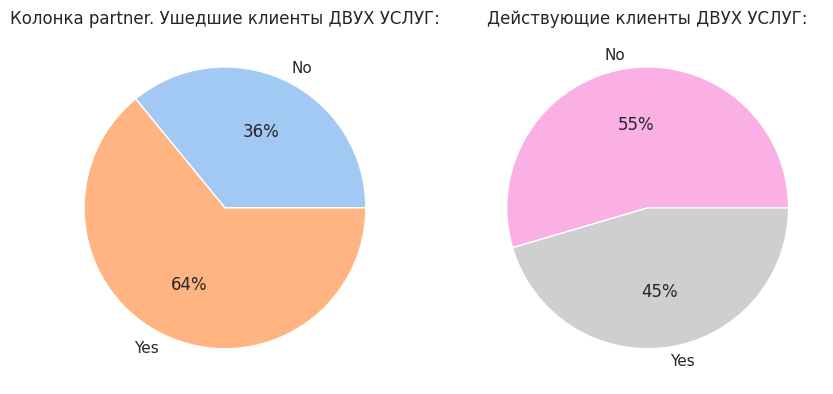

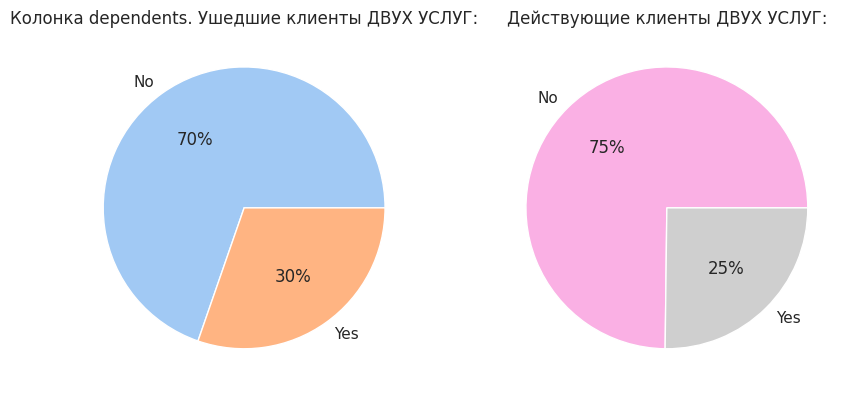

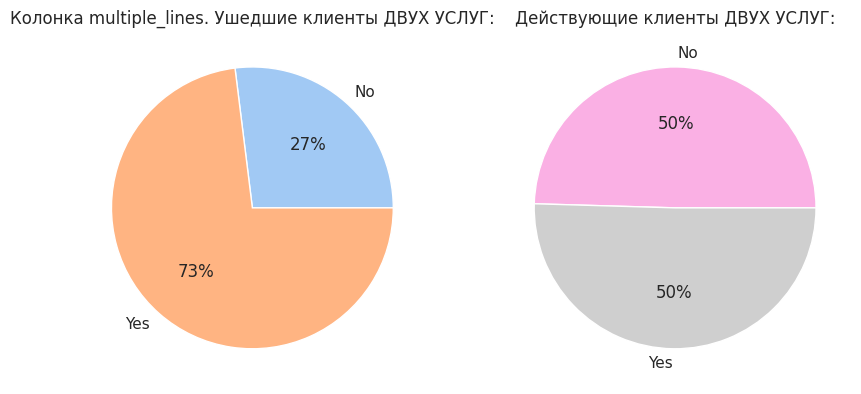

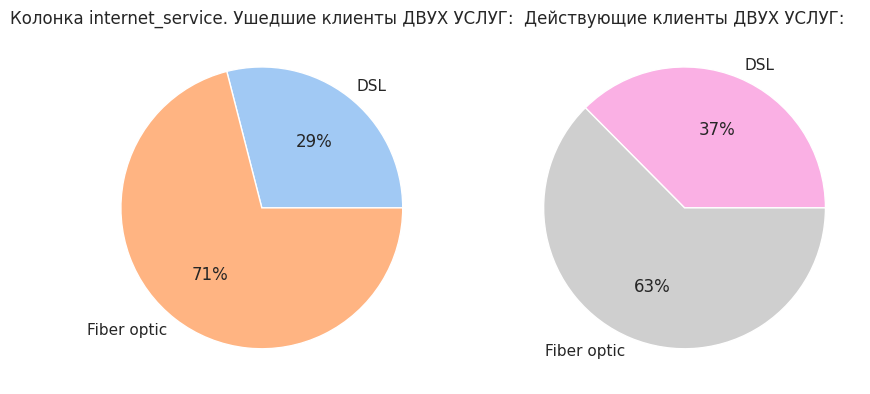

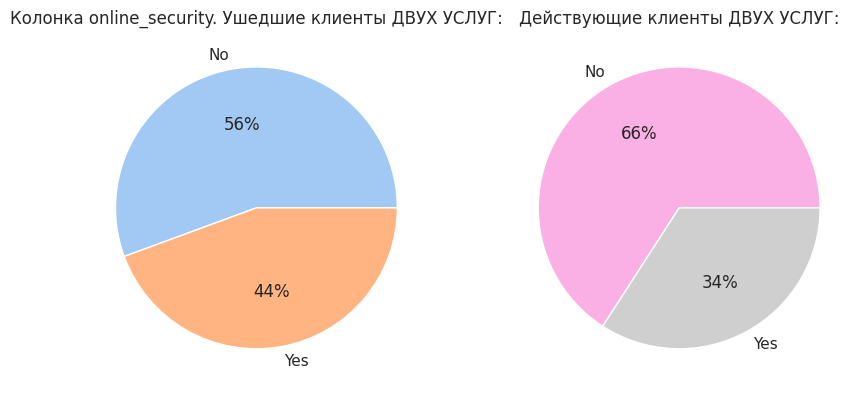

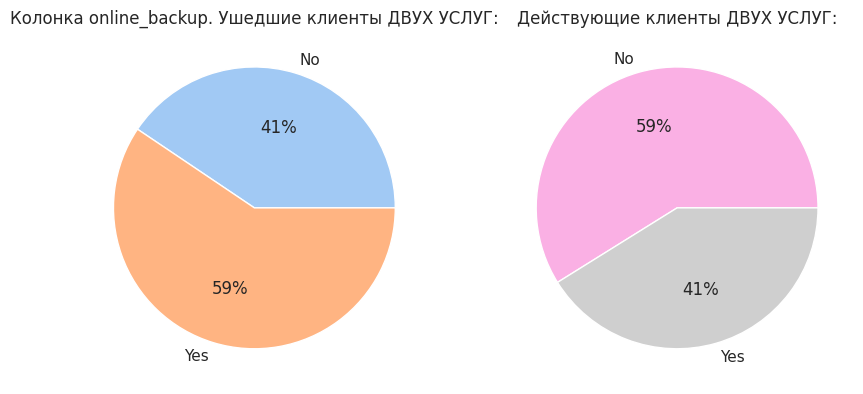

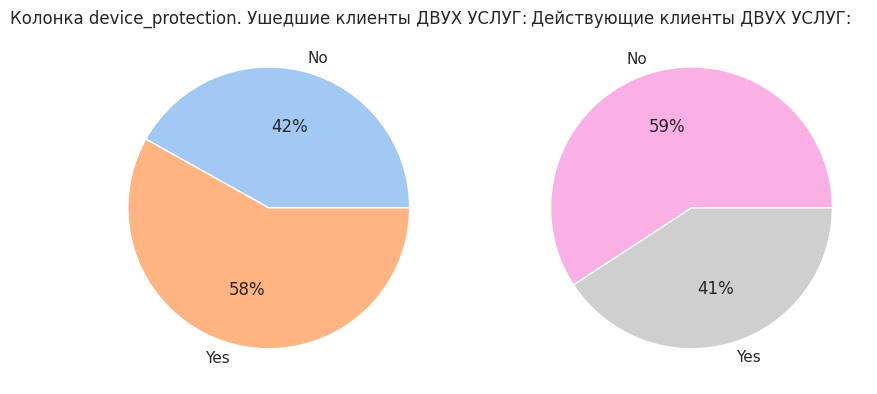

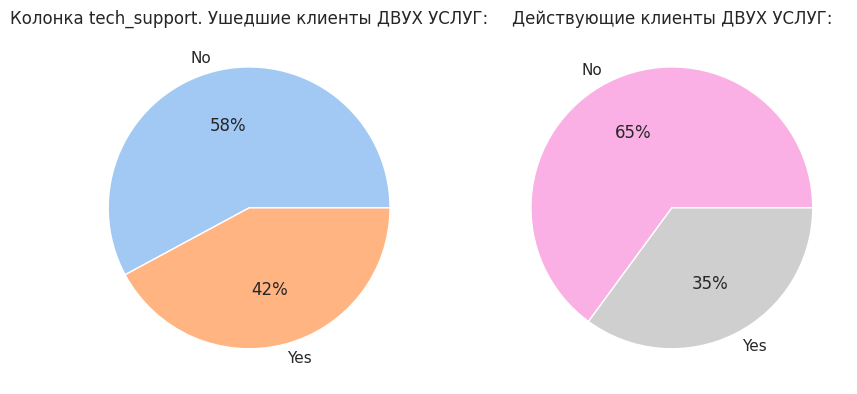

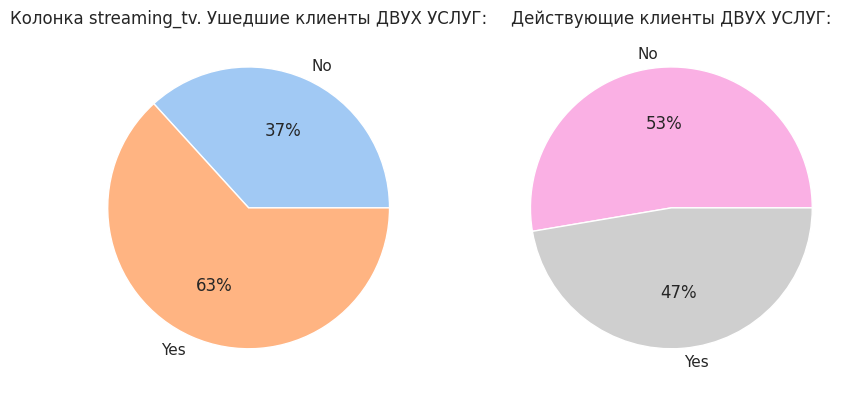

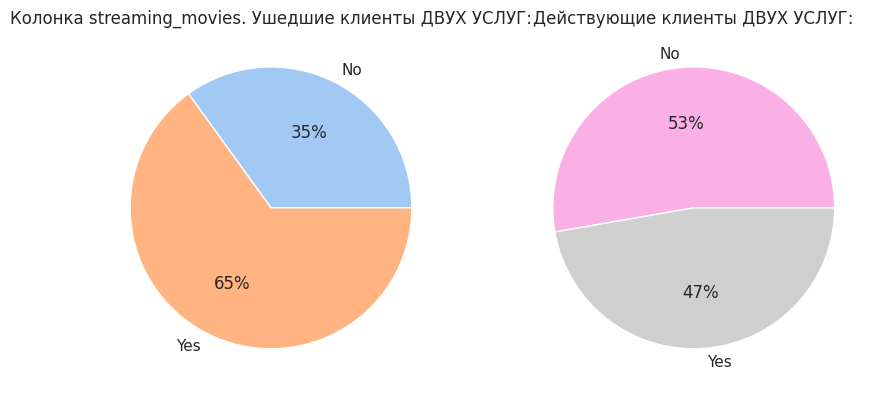

In [51]:
# ниже посмотрим по категориальным признакам
for col in df_merged.columns:
    if col not in features_num and col not in ['customer_id', 'begin_date', 'end_date', 'target']:
        df = departed_all.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])

        plt.rcParams["figure.figsize"] = (10,10)
        colors = sns.color_palette('pastel')[ 0:6 ]
        
        
        fig, ax = plt.subplots(1, 2)
        ax[0].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        
        
        
        df = current_all.groupby(col).count().reset_index()
        top = list(df.iloc[:, 1])
        labels_top = list(df.iloc[:, 0])
        colors = sns.color_palette('pastel')[ 6:11 ]
        ax[1].pie(top, labels = labels_top, colors = colors, autopct='%.0f%%')
        ax[0].set_title(f'Колонка {col}. Ушедшие клиенты ДВУХ УСЛУГ:')
        ax[1].set_title('Действующие клиенты ДВУХ УСЛУГ:')
        plt.show()
        
        print('\n' * 5)

In [52]:
# ушедшие пользователи только интернета
departed_internet = departed.query('(internet_service != "not used") and (multiple_lines == "not used")')['customer_id'].count()

In [53]:
# ушедшие пользователи только телефонии
departed_phone = departed.query('(internet_service == "not used") and (multiple_lines != "not used")')['customer_id'].count()

In [54]:
# ушедшие пользователи всех услуг
departed_all = departed.query('(internet_service != "not used") and (multiple_lines != "not used")')['customer_id'].count()

In [55]:
# действующие пользователи только интернета
current_internet = current.query('(internet_service != "not used") and (multiple_lines == "not used")')['customer_id'].count()

In [56]:
# действующие пользователи только телефонии
current_phone = current.query('(internet_service == "not used") and (multiple_lines != "not used")')['customer_id'].count()

In [57]:
# действующие пользователи всех услуг
current_all = current.query('(internet_service != "not used") and (multiple_lines != "not used")')['customer_id'].count()

In [58]:
print(f'Процент ушедших пользователей только интернета = {departed_internet / (departed_internet + current_internet) * 100:.2f}%')
print(f'Процент ушедших пользователей только телефонии = {departed_phone / (departed_phone + current_phone) * 100:.2f}%')
print(f'Процент ушедших пользователей сразу всех услуг = {departed_all / (departed_all + current_all) * 100:.2f}%')

Процент ушедших пользователей только интернета = 15.10%
Процент ушедших пользователей только телефонии = 10.48%
Процент ушедших пользователей сразу всех услуг = 17.33%


**Вывод по портрету**:

Я намеренно разложил исследование по услугам: только интернет, только телефония, обе услуги. Без этого тяжело увидеть какие-то закономерности.

Что можно сказать в общем по ушедшим пользователям:

- среди них явно больше семейных людей (либо в браке, либо с детьми). Это наблюдается во всех группах. Может конкуренты предлагают семейную подписку? Это лишь наблюдения.


- во всех группах средний показатель по тратам (ежемесячным платежам и общим) превышает тот же показатель у действующих клиентов.


- среди ушедших абонентов большой процент тех, у кого плата списывалась автоматически (либо с карты, либо со счета).


- много ушедших с двухлетней подпиской. Возможно, сомнительная выгода в длинной подписке.


Далее по отдельным группам.

Пользователи `телефонии`:


- среди ушедших больший процент пользователей мультилиний.



Пользователи `интернета`:


- у людей без телефонии в типе интернета только DSL (возможно, технические особенности).


- среди ушедших наблюдается повышенный процент пользователей таких доп. услуг как потоковое телевидение и кино, резервное копирование и защита устройства. Стоит обратить на это внимание. Возможно, дело в качестве этих услуг, либо в скрытой подписке к этим сервисам (опять же, всего лишь мысли). Более высокие затраты у ушедших пользователей также могут вытекать из этих услуг. 

## Проверка мультиколлинеарности

Много категориальных признаков, поэтому будем использовать phik.

In [59]:
phik_overview = df_merged.drop('customer_id', axis=1).phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'count_days'])

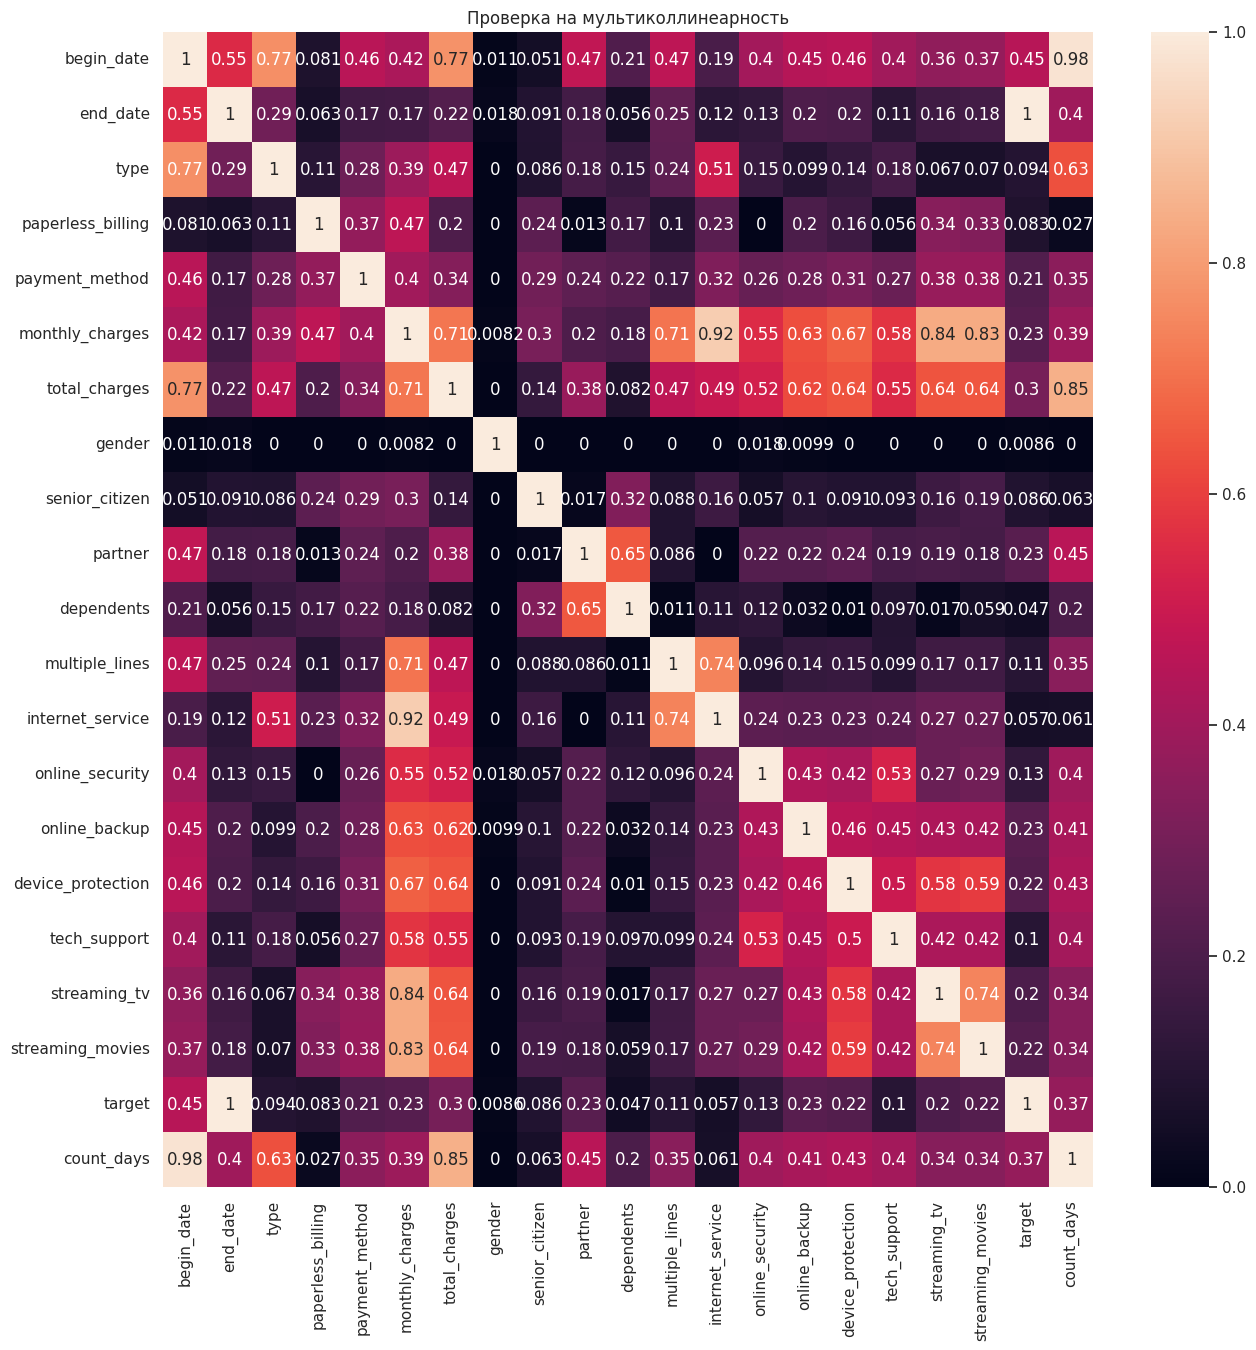

In [60]:
plt.figure(figsize=(15, 15))
sns.heatmap(phik_overview, annot=True)
plt.title('Проверка на мультиколлинеарность');

In [61]:
phik_overview['target'].sort_values(ascending=False)

end_date             1.000000
target               1.000000
begin_date           0.450254
count_days           0.374569
total_charges        0.304287
online_backup        0.229482
partner              0.226688
monthly_charges      0.226280
streaming_movies     0.222232
device_protection    0.218380
payment_method       0.214832
streaming_tv         0.200198
online_security      0.132594
multiple_lines       0.105101
tech_support         0.103652
type                 0.094015
senior_citizen       0.086159
paperless_billing    0.083398
internet_service     0.056621
dependents           0.046871
gender               0.008581
Name: target, dtype: float64

**Выводы по анализу**:

- стоит удалить колонку `monthly_charges` из-за высокой связи с `internet_service`, `streaming_movies` и `streaming_tv`: влияние на целевую переменную у `monthly_charges` такое же как и у `streaming_movies` и `streaming_tv`, лучше удалить один признак вместо трех;

- удалим `end_date` и `begin_date`, так как самое полезное из этих колонок теперь в `count_days`;

- удалим `customer_id`

In [62]:
df_merged.drop(columns={'monthly_charges', 'end_date','begin_date','customer_id'}, inplace=True)

In [63]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   total_charges      7043 non-null   float64
 4   gender             7043 non-null   object 
 5   senior_citizen     7043 non-null   int64  
 6   partner            7043 non-null   object 
 7   dependents         7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  target             7043 

## Разделение данных на подвыборки

In [64]:
# сохраним в константу random_state
RS = 190623

In [65]:
features = df_merged.drop('target', axis=1)
target = df_merged['target']

In [66]:
# Сначала выделим тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, stratify=target, random_state=RS)

In [67]:
display(features_train.shape)
target_train.shape

(5282, 17)

(5282,)

In [68]:
display(features_test.shape)
target_test.shape

(1761, 17)

(1761,)

## Стандартизация и кодирование

In [69]:
# создадим списки с числовыми и категориальными переменными
numeric = ['count_days','total_charges']
category = ['type', 'paperless_billing', 'payment_method',
       'gender', 'partner', 'dependents', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

scaler = StandardScaler()
ordinalencoder = OrdinalEncoder()

numeric_transformer = Pipeline(steps=[("scaler", scaler)])
categorical_transformer = Pipeline(steps=[("encoder", ordinalencoder)])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric),
        ("cat", categorical_transformer, category),
    ], remainder='passthrough'
)

## Построение моделей

### Random Forest

In [70]:
model_forest = RandomForestClassifier(random_state=RS)
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model_forest)])
parametrs = {'classifier__n_estimators':[310,320,330], 
             'classifier__max_depth':[7,8,9]}

In [71]:
search = GridSearchCV(pipe, parametrs, n_jobs=-1, scoring='roc_auc')
search.fit(features_train, target_train)
print("Лучший AUC (CV score=%0.3f):" % search.best_score_)
print('Лучшие параметры:')
print(search.best_params_)

Лучший AUC (CV score=0.829):
Лучшие параметры:
{'classifier__max_depth': 8, 'classifier__n_estimators': 320}


Здесь же можем взглянуть на важность признаков с помощью feature_importances_:

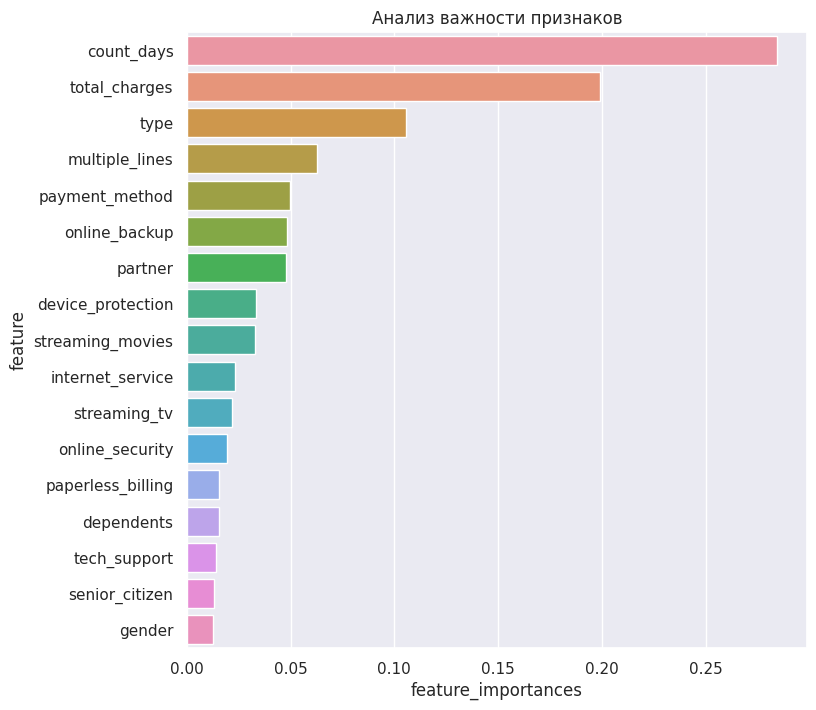

In [72]:
features_train_fi = features_train.copy()
features_train_fi[numeric] = scaler.fit_transform(features_train_fi[numeric])
features_train_fi[category] = ordinalencoder.fit_transform(features_train_fi[category])

model_forest = RandomForestClassifier(random_state=RS, max_depth=8, n_estimators=320)
model_forest.fit(features_train_fi, target_train)

feature_importances = model_forest.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(features_train_fi.columns),
                                      'feature_importances':feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)
plt.figure(figsize=(8, 8))
plt.title('Анализ важности признаков')
sns.barplot(x=feature_importances_df.feature_importances, y=feature_importances_df.feature);

Уже можем выделить топ-5 признаков, которые вносят существенный вклад в обучение:


- количество дней сотрудничества


- суммарные затраты абонента


- тип платежа


- наличие мультилиний


- пятое место делят: способ оплаты, семейное положение и доп. услуга "Резервное копирование".

Стоит отметить, что на все эти пункты мы обратили внимание при составлении портрета уходящего клиента. 

### CatBoost

In [73]:
clf_cat_boots = CatBoostClassifier(loss_function="Logloss", eval_metric='AUC',iterations=9951, random_state=RS) 
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", clf_cat_boots)])
parametrs = {'classifier__learning_rate':[0.01],
             'classifier__depth':[3,4], 
             'classifier__verbose':[False]}

clf = GridSearchCV(pipe, parametrs, n_jobs=-1, scoring='roc_auc', verbose=10)
clf.fit(features_train, target_train)

print()
print('Лучшие параметры:')
print()
print(clf.best_params_)
print()
print(f'Лучший AUC: {clf.best_score_}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Лучшие параметры:

{'classifier__depth': 3, 'classifier__learning_rate': 0.01, 'classifier__verbose': False}

Лучший AUC: 0.9234040122150793


In [74]:
model_cat = CatBoostClassifier(loss_function="Logloss", iterations=9951, learning_rate=0.01, depth=3, random_state=RS)
model_cat.fit(features_train_fi, target_train, verbose=False)

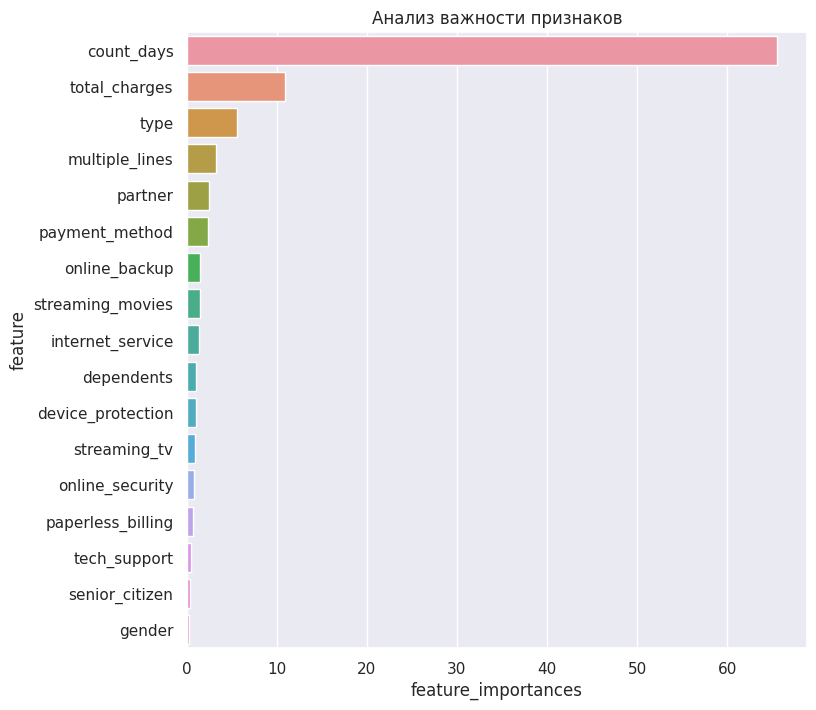

In [75]:
feature_importances = model_cat.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(features_train_fi.columns),
                                      'feature_importances':feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)
plt.figure(figsize=(8, 8))
plt.title('Анализ важности признаков')
sns.barplot(x=feature_importances_df.feature_importances, y=feature_importances_df.feature);

Можем выделить топ-5 признаков, которые вносят существенный вклад в обучение:


- количество дней сотрудничества


- суммарные затраты абонента


- тип платежа


- наличие мультилиний


- пятое место делят: способ оплаты, семейное положение.

In [76]:
print(f'Качество модели на кросс-валидационной выборке:\n{clf.best_score_:.3f}')

Качество модели на кросс-валидационной выборке:
0.923


## Проверка на тестовой выборке

In [77]:
# стандартизируем и кодируем тестовую выборку
features_test[numeric] = scaler.transform(features_test[numeric])
features_test[category] = ordinalencoder.transform(features_test[category])

In [78]:
test_score = roc_auc_score(target_test, model_cat.predict_proba(features_test)[:,1])
print(f'Качество модели на тестовой выборке:\n{test_score:.3f}')

Качество модели на тестовой выборке:
0.944


**Промежуточный вывод**:

Необходимого качества удалось добиться с помощью модели CatBoostClassifier. Итоговое качество на тесте = 0,944.

Для наглядности изобразим ROC-кривую. А также посчитаем accuracy, чтобы для заказчика результат был более понятен:

In [79]:
y_pred_proba = model_cat.predict_proba(features_test)[:, 1]

In [80]:
fpr, tpr, thresholds = roc_curve(target_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

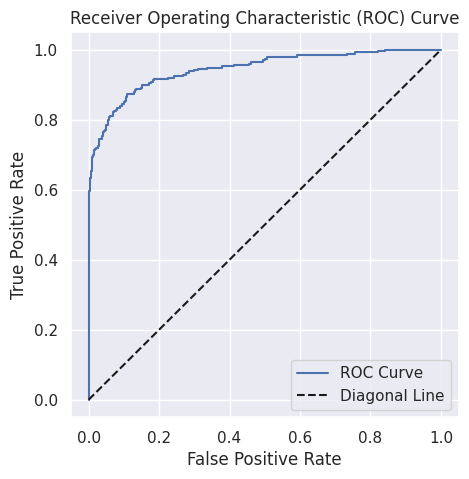

In [81]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Diagonal Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [82]:
test_accuracy = accuracy_score(target_test, model_cat.predict(features_test))
print(f'Accuracy модели без подбора порога на тестовой выборке:\n{test_accuracy:.3f}')

Accuracy модели без подбора порога на тестовой выборке:
0.940


Ниже попробуем поднять accuracy, используя разный порог (вместо базового = 0,5):

In [83]:
predict = model_cat.predict_proba(features_test)[:,1]
best_thres = 0.01
max_f_score = 0
for i in range(1,100):
    thres = i / 100
    var = accuracy_score(target_test, list(map(int, predict >= thres)))
    if var > max_f_score:
        max_f_score = var
        best_thres = thres

In [84]:
print(f'Лучший порог: {best_thres}')
print(f'Accuracy при данном пороге: {max_f_score}')

Лучший порог: 0.46
Accuracy при данном пороге: 0.9426462237365133


Стоит ознакомится с матрицей ошибок:

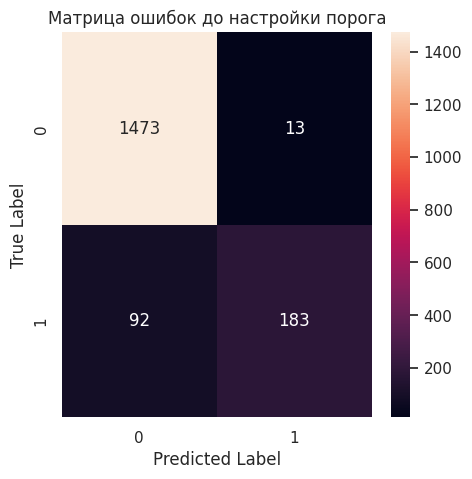

In [85]:
cm = confusion_matrix(target_test, model_cat.predict(features_test))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Матрица ошибок до настройки порога')
plt.show()

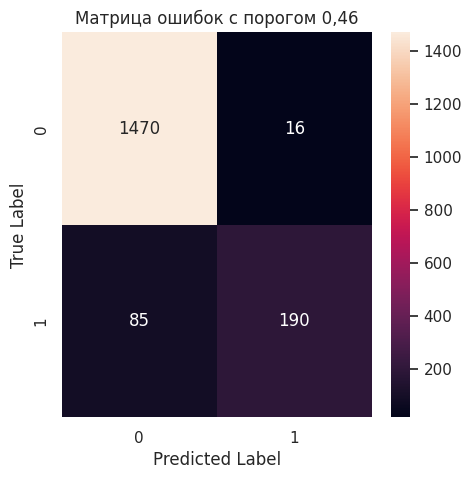

[CV 1/5; 1/2] START classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False
[CV 1/5; 1/2] END classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False;, score=0.933 total time=  30.6s
[CV 3/5; 1/2] START classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False
[CV 3/5; 1/2] END classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False;, score=0.916 total time=  34.1s
[CV 5/5; 1/2] START classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False
[CV 5/5; 1/2] END classifier__depth=3, classifier__learning_rate=0.01, classifier__verbose=False;, score=0.928 total time=  38.9s
[CV 2/5; 2/2] START classifier__depth=4, classifier__learning_rate=0.01, classifier__verbose=False
[CV 2/5; 2/2] END classifier__depth=4, classifier__learning_rate=0.01, classifier__verbose=False;, score=0.918 total time=  38.2s
[CV 4/5; 2/2] START classifier__depth=4, classifier__learning_rate=0.01, classifier_

In [86]:
cm = confusion_matrix(target_test, list(map(int, model_cat.predict_proba(features_test)[:,1] >= 0.46)))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Матрица ошибок с порогом 0,46')
plt.show()

Благодаря изменению порога удалось уменьшить ложноотрицательное предсказание модели, но при этом повысилось ложноположительное.


В нашем случае лучше так, потому что нам лучше лишний раз принять клиента за собирающегося уходить и провести работу с ним, чем не заметить потенциально ушедшего клиента совсем.

Про убытки и прибыль можно отметить два важных момента:


- на данный момент ушедшие пользователи - это только убытки, работа с потенциально ушедшими не проводится. А это означает, что если модель уже как-то определяет ушедших пользователей - можно предпринять различные действия по их удержанию;


- не всех ушедших пользователей модель предсказывает, что немного расстраивает. Около 30% ушедших пользователей из тестовой выборки определить не удалось - так они и ушли. В любом случае, модель определяет уже немалую часть потенциально ушедших, а также проведенный анализ ушедших пользователей заставляет обратить внимание на некоторые услуги (эти проблемы описаны в портрете пользователя). Повысить точность модели позволит увеличение данных, где будет больше информации об ушедших пользователях. 

**Промежуточный вывод по моделям и результату**:

- В начале работы мы соединили 4 исходных таблицы в один датафрейм, изменили названия столбцов, тип данных в колонках, где это необходимо.
    
---

- Дополнительно создали столбец с продолжительностью сотрудничества с конкретным абонентом (в днях).            В последствии этот столбец стал самым важным признаком в обучении модели.
    
---

- Также поискали аномалии в данных, ничего запредельного обнаружено не было.
    
---

- Далее декомпозировали информацию об ушедших клиентах и составили портрет уходящего пользователя. Согласно  ему, ушедшие пользователи тратят на услуги больше, среди ушедших больше семейных людей, абонетов с длительной подпиской (сразу на два года), с автоматическим списанием средств за подписку. Также есть связь с использованием мультилиний, а также доп. услугами для интернета (возможно, есть какие-то проблемы с ними).
    
---

- С помощью библиотеки phik провели анализ мультиколлинеарности признаков, убрали некоторые столбцы, чтобы   понизить этот показатель.
    
---

- Разделили данные на подвыборки (3 к 1), использовав пайплайн перекодировали категориальные значения и стандартизировали числовые признаки.
    
---

- Обучили модели случайного леса и градиентного бустинга, с помощью кросс-валидации выбрали более качественную модель. Далее оценили важность признаков, самым важным из которых является созданный нами признак по сроку сотрудничества с абонентом.
    
---

- Проверили модель на тестовой выборке, сравнив результат с требуемым в задаче. Показатель ROC-AUC в нашей   работе равен 0,94. При этом для интерпретируемости заказчиком был также оценен показатель accuracy. Перебрав порог предсказаний нашей модели и изменив его, удалось снизить количество ложноотрицательных предсказаний.

## Отчет для заказчика

В этом пункте мы опишем особенности проведенного исследования и обучения модели.

- все пункты, которые мы выделили в плане были нами выполнены. Еще раз кратко опишем эти пункты:


    - предобработка данных (объединили, заполнили пропуски, привели названия колонок к стандарту)
    - создали признак "Срок сотрудничества с клиентом в днях"
    - составили портрет уходящего абонента
    - убрали признаки с мультиколлинеарностью
    - подготовили пайплайн и обучили две модели
    - исследовали лучшую модель на предмет важности признаков
    
    
Здесь также стоит обратить внимание на вопросы заданные заказчику в начале исследования, они не потеряли своей актуальности, а именно:

1) Стоит ли декомпозировать задачу и создать отдельные модели под разные категории клиентов (телефония, интернет, телефония + интернет)?


2) Есть ли возможность предоставить дополнительные данные по клиентам (география, дата рождения, дополнительные тех. характеристики по услугам)?


- касательно трудностей, работа осуществлялось достаточно гладко. В этом сильно помогла "чистота" данных. Под этим я подразумеваю отсутствие большого количества пропусков в данных, неявных дубликатов. Одной из трудностей можно назвать несбалансированность целевого признака. Но это особенность бизнес-цели: негативные моменты встречаются реже, и с одной стороны это хорошо, с другой - для более точного определения уходящего класса модель нуждается в большем количестве данных.


- ключевые шаги в работе можно выделить следующие:


    - объединение данных и заполнение недостающих значений согласно логике этих пропусков
    - составления портрета абонента
    - выделение важных для обученной модели признаков
    

- касательно признаков стоит сказать отдельно: самыми важными признаками с точки зрения обучения являются "Количество дней сотрудничества", "Суммарные затраты абонента", "Тип платежа", "Наличие мультилиний", "Способ оплаты", "Семейное положение" и доп. услуги для интернет-пользователей.


Стоит обратить внимание, что при анализе уходящего клиента мы выделили эти же признаки, хоть и руководствовались наблюдениями и чистой логикой. Следовательно, такое совпадение игнорировать не стоит и не лишним будет уделить время более тщательному анализу всех этих признаков и их влияния на лояльность клиента, но уже с профессиональной стороны (отделы, которые напрямую занимаются доп. услугами, работой с клиентами, техподдержкой и т.д.).


- итоговой моделью была выбрана модель на основе градиентного бустинга. Поставленный заказчиком порог выбранной метрики был превышен на 9 пунктов. Для более понятной интерпретации была использована метрика Accuracy, которая достигла уровня 0,94. Однако, стоит также упомянуть, что при исследовании ошибок нашей модели удалось выяснить, что 30% уходящих клиентов модель не смогла выявить (в нашей тестовой выборке). Повлиять на это можно увеличением данных как по общему числу клиентов, так и по дополнительным характеристикам, которые были предложены в вопросах заказчику. При этом 70% уходящих клиентов модель выявила, что определенно можно назвать успешным решением поставленной задачи.

- для обучения модели были использованы следующие признаки (указываю в порядке важности, от более важных к менее):


    - количество дней сотрудничества - числовой признак, созданный нами из двух исходных колонок с датой начала и конца заключения договора;
    - суммарные затраты абонента - числовой признак;
    
    Все численные признаки мы стандартизировали. Далее категориальные.
    
    
    - тип абонентской платы;
    - наличие мультилиний;
    - семейное положение абонента;
    - способ оплаты;
    - доп. услуга "Резервное копирование";
    - доп. услуга "Потоковое кино";
    - тип интернет-соединения;
    - наличие иждевенцев;
    - доп. услуга "Защита устройств";
    - доп. услуга "Потоковое ТВ";
    - доп. услуга "Безопасность";
    - тип отчета;
    - доп. услуга "Тех. поддержка"
    - статус пожилого гражданина;
    - пол.
    
    Категориальные были перекодированы с помощью OrdinalEncoder.
    
    
- также забыл отметить целевой признак - он был создан на основе колонки "EndDate". Является категориальным ("1" - ушедший клиент, "0" - действующий клиент)

- модель для обучения - CatBoostClassifier. Обучение проводилось на 9951 итерации алгоритма. Выделим следующие гиперпараметры:


    - функция потерь - LogLoss;
    - learning rate - 0.01;
    - глубина деревьев - 3.
    
    
- из констант фиксировали только random state - 190623.